# **AM 207**: Homework 4

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday April 7th, 2016**

<div class="alert alert-info">
<strong>
Submission by Kendrick Lo (Harvard ID: 70984997) for <br>
AM 207 - Stochastic Methods for Data Analysis, Inference, and Optimization
</strong>
<br><br>
Collaborators: A. Lee., G. Dominedo, R. Maat, TF's (OHs)
</div>

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW4.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an executed status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW4.tar.gz or AM207_YOURNAME_HW4.zip


### Have Fun!
_ _ _ _ _

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time
import timeit

import scipy.stats 
import pandas as pd
import pymc as pm

import re
import numpy as np

# Problem 1: Bayesian Models for Yelp Check-in Data

Below is a visualization of Yelp checkins on a portion of the Las-Vegas strip. The goal of this problem is to model an intensity surface on this map which is indicative of the propensity of an individual to check in at a particular location.
<img src="Rplot.jpeg">
Such an intensity surface is very valuable for example to decide what would be good places to open another casino or restaurant. 

The first hierarchical model will use a conjugate prior (and hence we can compute an analytical solution) and the second will use a non-conjugate set up with correlated priors.

### Data description
We have M grid squares of width $w=0.005$. The variable `checkins` contains M checkin values, one for each square. The variable `X` contains the coordinates of the center of each square. This data set is a subset of the map shown above.

In [264]:
#load checkins
checkins = np.genfromtxt('checkin_counts.csv', delimiter=',')
#load latitude and longitude values associated with each count value
X = np.genfromtxt('X.csv', delimiter=',')
#set M to the length of the checkins vector
M = checkins.size
#set grid width w to be .0005 latitude/longitude
w = .0005  

### Conjugate Model
In the first model, we assume that a map (i.e., the Las Vegas strip) is discretized into $M$ grid squares of width $w$, and the checkins in cell $i$, denoted by $Y_i$, are distributed according to a $Pois(w^2\lambda_i)$ distribution. (That is, the check-ins follow a Poisson process conditioning on the $\lambda$, and $\lambda \in \mathbb{R}^M$ is the intensity surface we would like to infer.) Furthermore $\lambda_i$ is drawn from a conjugate $Gamma(\alpha, \beta)$ distribution. The $Y_i$ are conditionally independent on $\lambda_i$, and $\lambda_i$ is indepndent of $\lambda_j$ for $i \neq j$.

Derive the posterior distribution $p(\lambda_i|Y_i)$ for this model analytically as a function of hyperparameters $\alpha$ and $\beta$. Use the posterior mean as an estimate for $\lambda_i$, and then plot the posterior mean of $\lambda_i$ on a grid for varying values of $\alpha$ and $\beta$. Discuss if this model leads to a useful intensity surface, and how the usefulness of the result is influenced by the choice of $\alpha$ and $\beta$.

<div class="alert alert-info">
<h2>Answer</h2>
<p>References: Wikipedia (distributions),  Piazza
</div>

From Bayes Rule, we know that generally: 

$$posterior \propto prior \text{  x  } likelihood$$

We are asked to solve for the posterior distribution $p(\lambda_i|Y_i)$. The prior is distributed as $Gamma(\alpha, \beta)$, therefore we can write out the prior distribution:

$$p(\lambda_i) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda_i^{\alpha-1} e^{-\beta\lambda_i} $$

The "likelihood" for $Y_i$, which represents checkins for a single cell, is assumed to be Poisson distributed with parameter $w^2\lambda_i$. Therefore, we can write out the likelihood distribution:

$$p(Y_i|\lambda_i) = \frac{(w^2\lambda_i)^{Y_i} e^{-w^2\lambda_i}}{Y_i!}$$

Accordingly, the posterior is given by:

$$
\begin{aligned}
p(\lambda_i|Y_i) &= \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda_i^{\alpha-1} e^{-\beta\lambda_i} \frac{(w^2\lambda_i)^{Y_i} e^{-w^2\lambda_i}}{Y_i!} \\
&\propto \lambda_i^{\alpha-1} e^{-\beta\lambda_i} \lambda_i^{Y_i} e^{-w^2\lambda_i} \\
&= \lambda_i^{\alpha -1 + Y_i} e^{-\beta\lambda_i -w^2\lambda_i} \\
&= \lambda_i^{(\alpha + Y_i)-1} e^{-(\beta + w^2)\lambda_i}
\end{aligned}
$$

Note that if we define new parameters $\alpha^{*} = \alpha + Y_i$ and $\beta^{*} = \beta + w^2$, we see that the posterior is distributed as $Gamma(\alpha^{*}, \beta^{*}) = Gamma(\alpha + Y_i, \beta + w^2)$.

From known properties of the Gamma distribution, the mean of this posterior distribution is $\frac {\alpha^{*}}{\beta^{*}} = \frac{\alpha + Y_i}{\beta + w^2}$. We use this as our estimate for $\lambda_i$.

We can actually use the same `plot_checkins` function as it simply plots dots with weights from whatever vector we give it. We can give it a vector of $\lambda_i$'s and plot it for various choices of $(\alpha, \beta)$.

In [265]:
# This function takes a vector of M intensities and plots it according to the coordinates in `X`.
# The values of the intensities are normalized to [0,1] and darker means higher values
def plot_checkins(checkins, title=""):
    plt.figure()
    colors = checkins / np.double(np.max(checkins))
    plt.scatter(X[:,0], X[:,1], s=10, c=colors, cmap='gray_r', edgecolors='none', vmin=0)
    plt.title(title)
    plt.show()   
# plot_checkins(checkins)

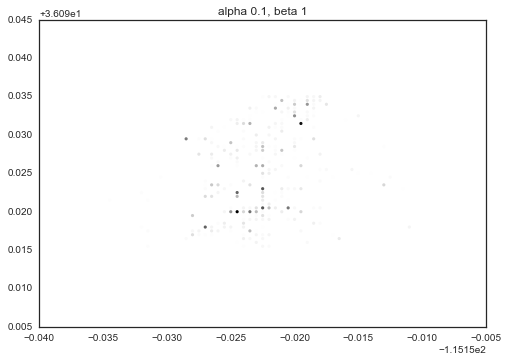

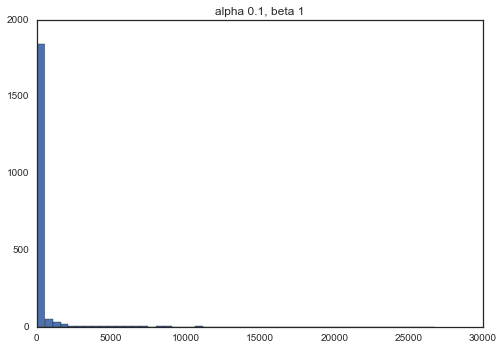

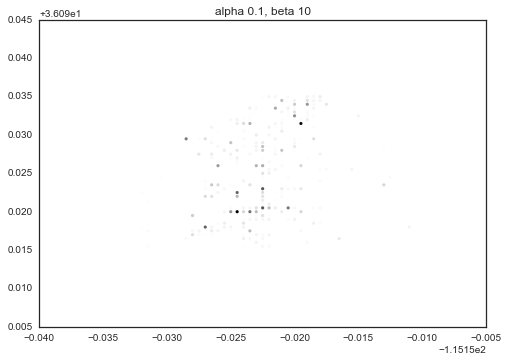

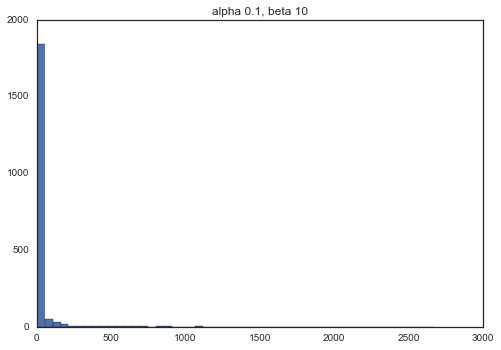

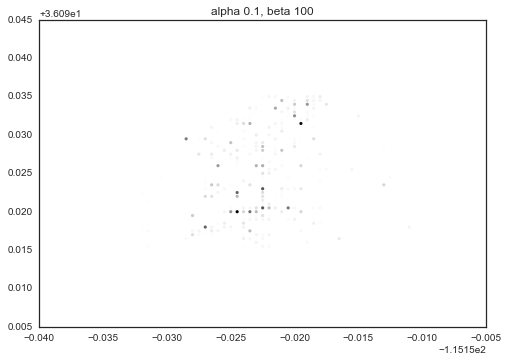

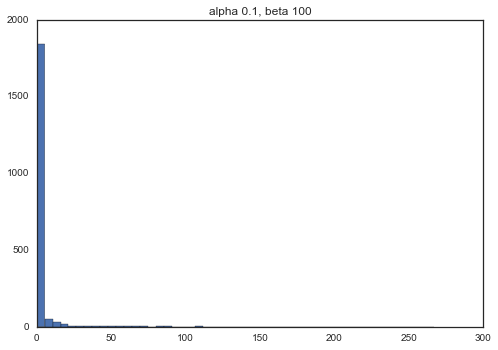

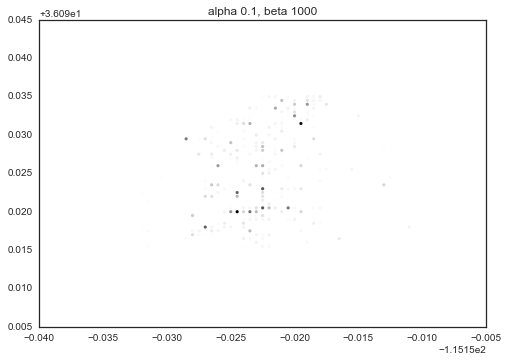

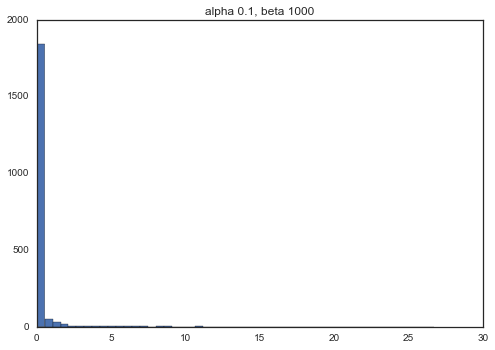

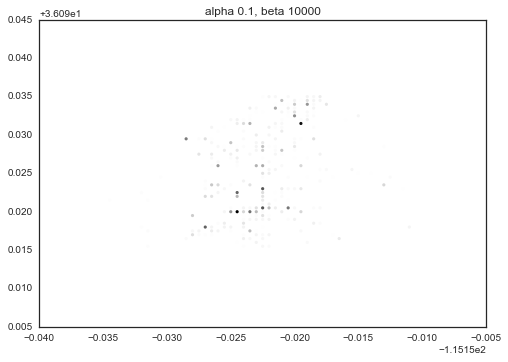

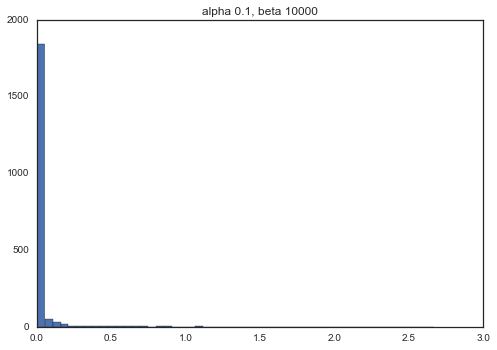

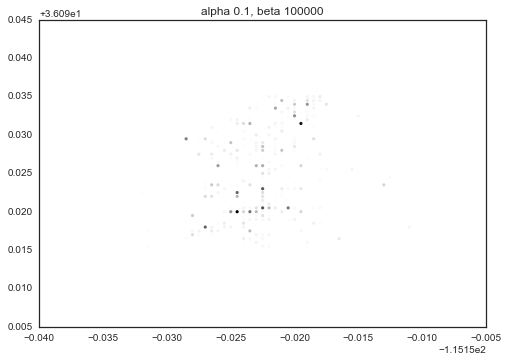

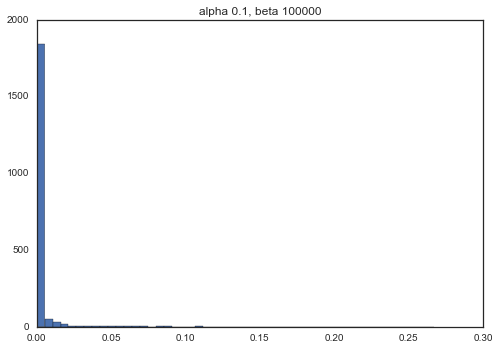

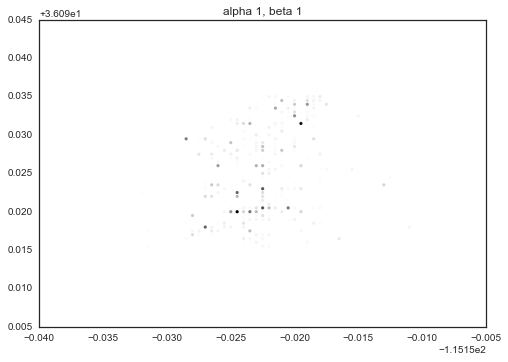

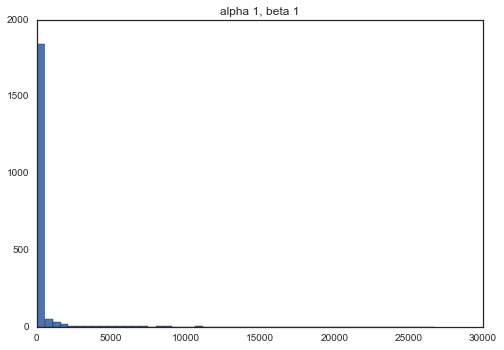

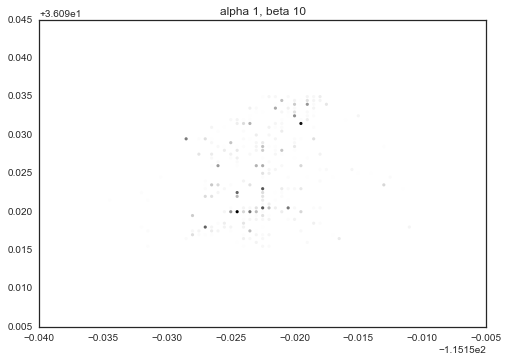

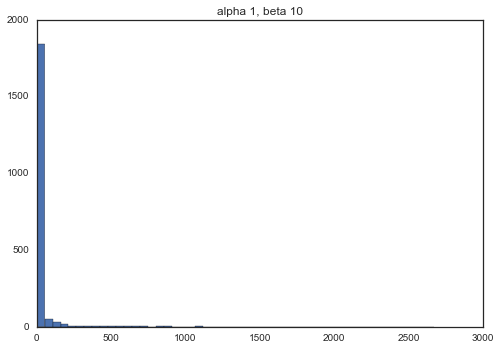

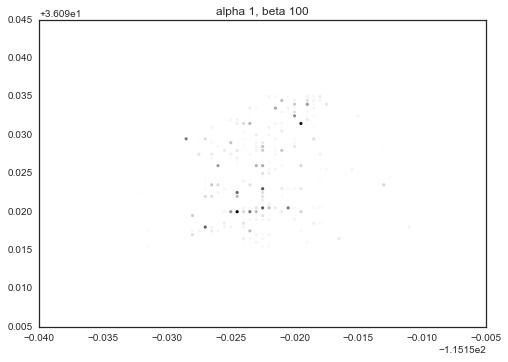

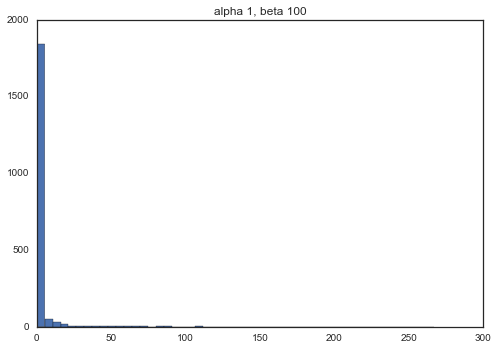

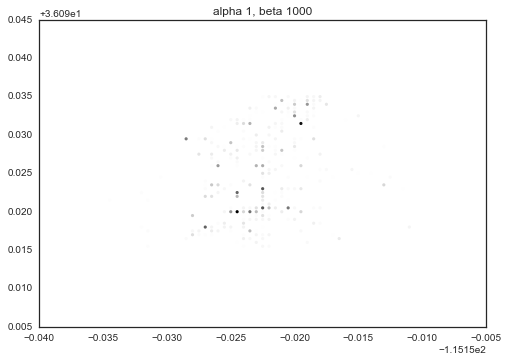

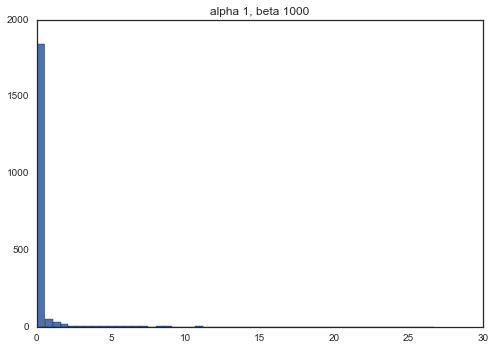

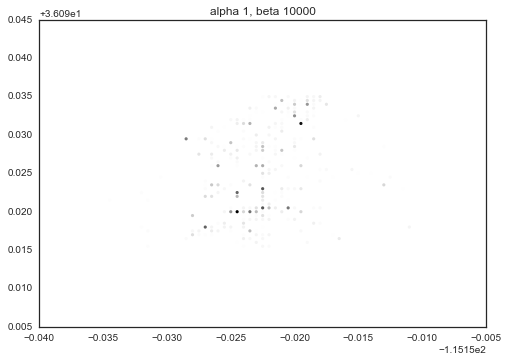

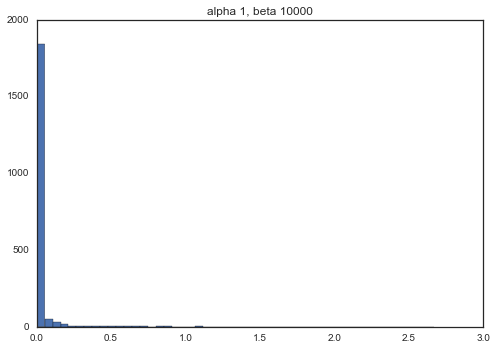

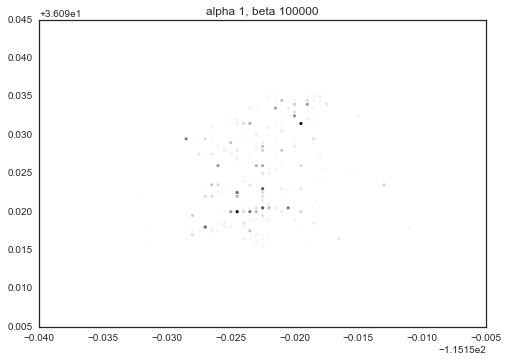

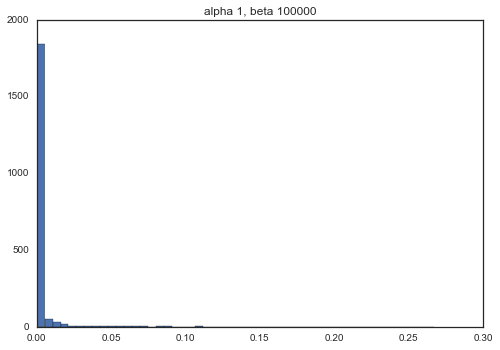

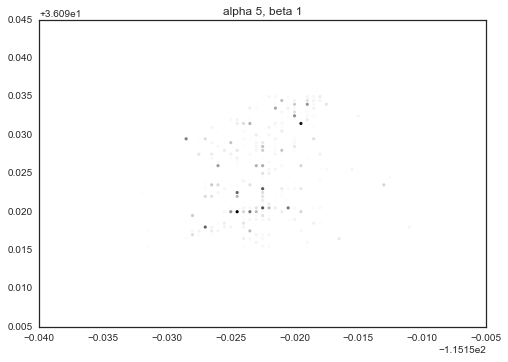

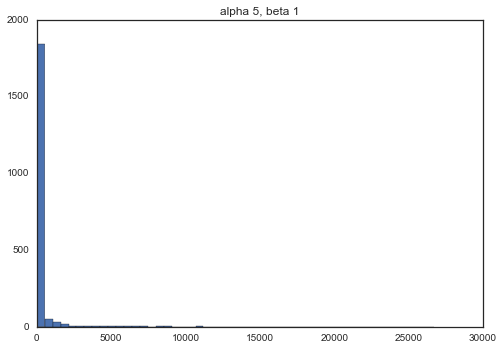

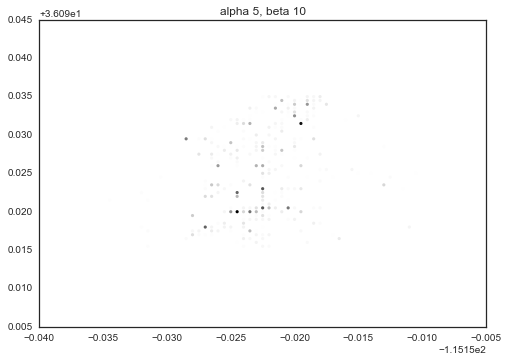

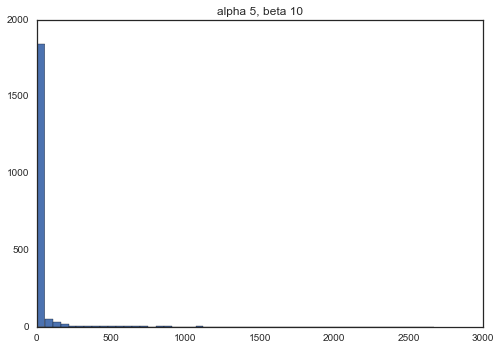

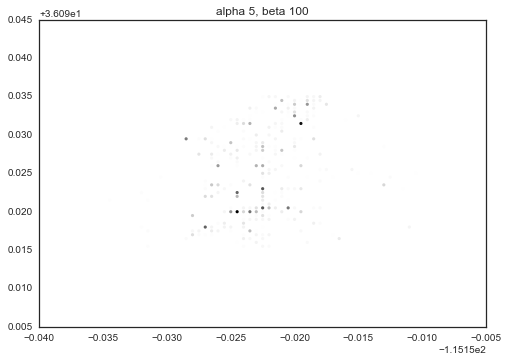

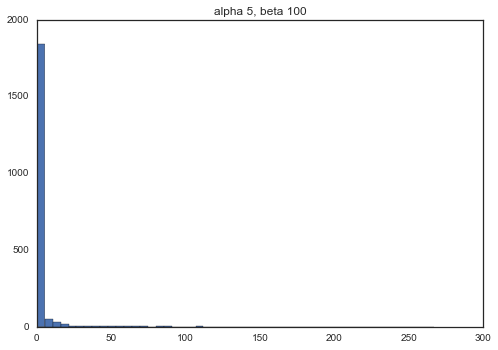

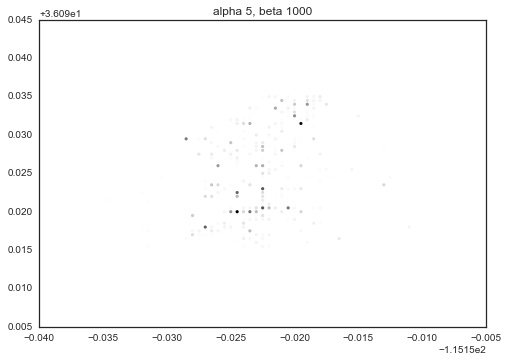

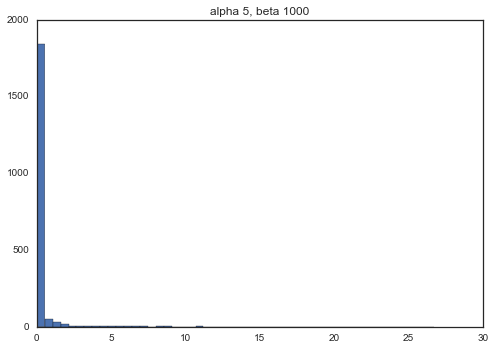

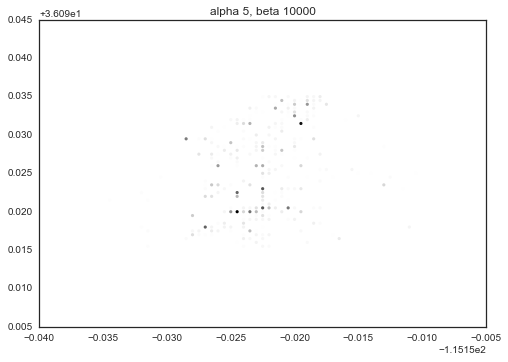

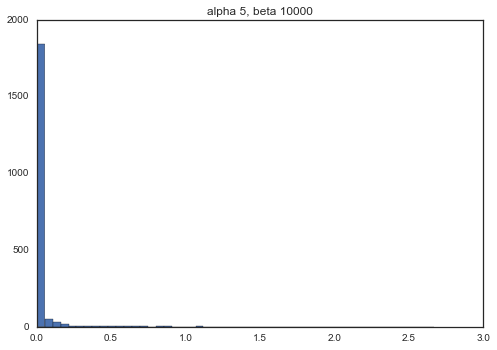

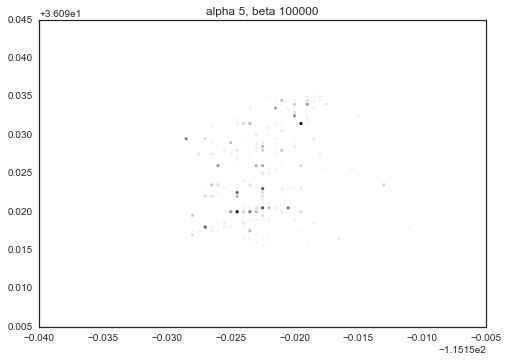

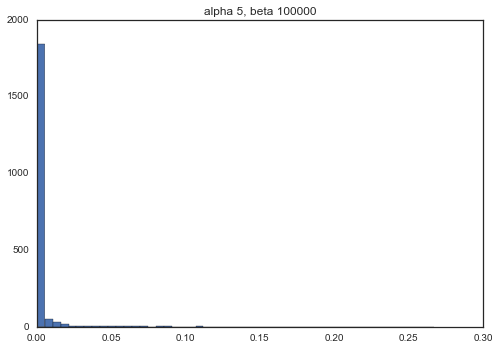

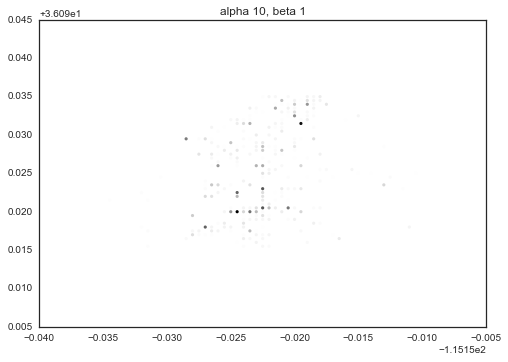

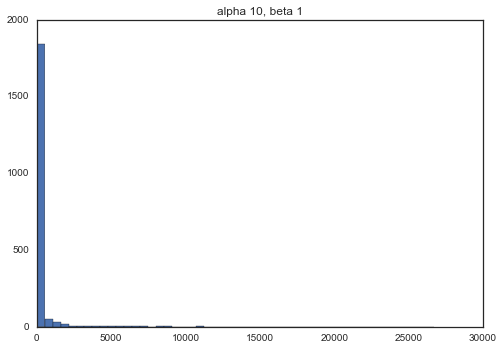

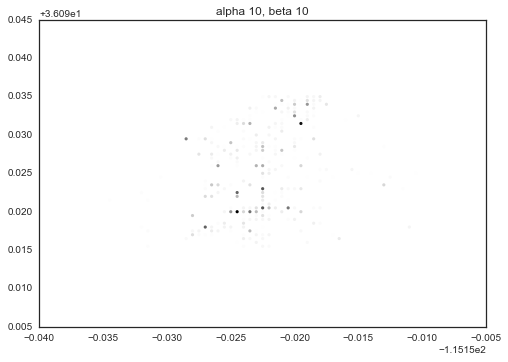

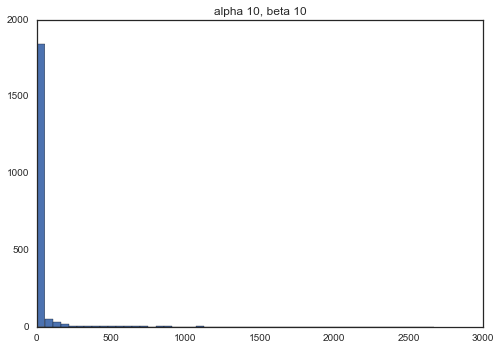

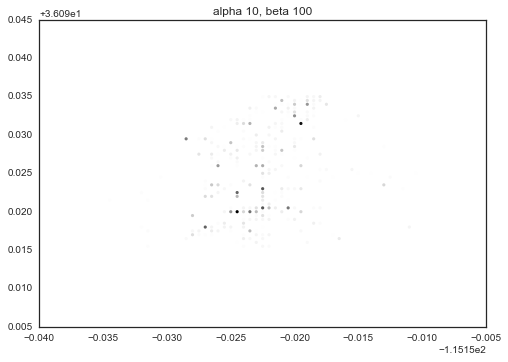

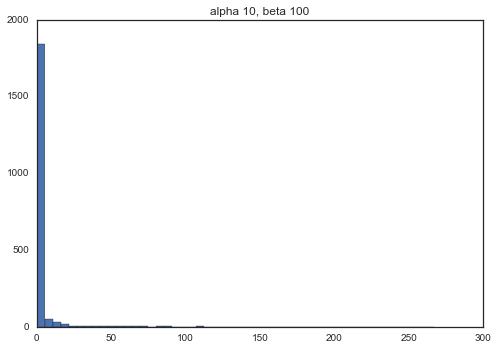

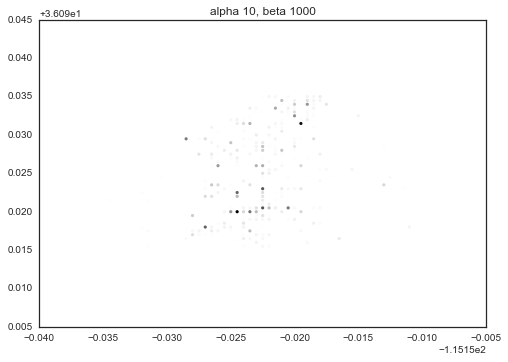

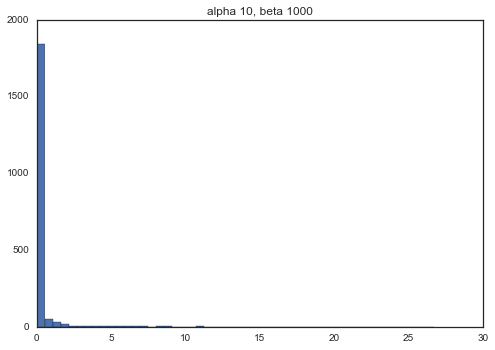

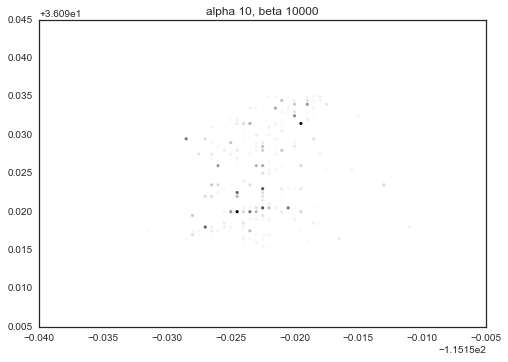

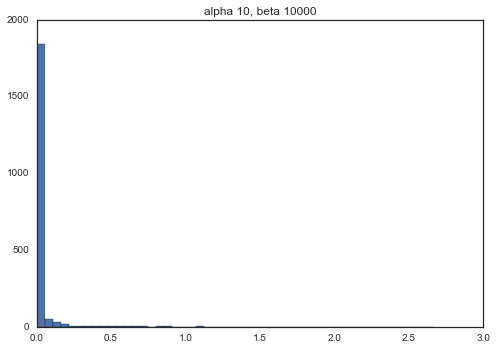

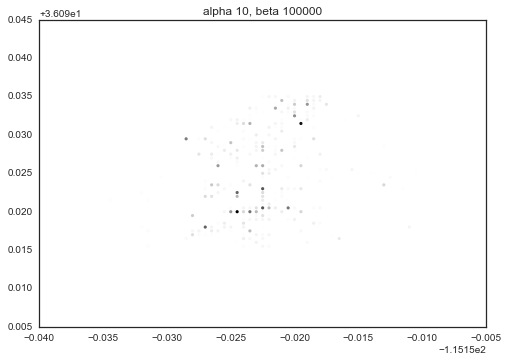

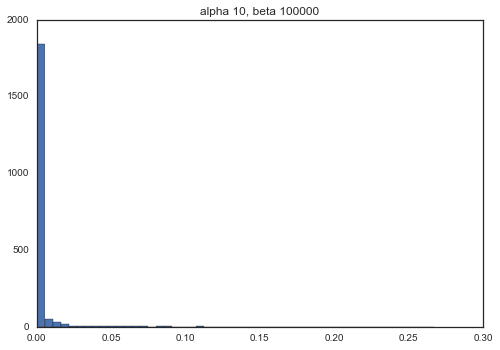

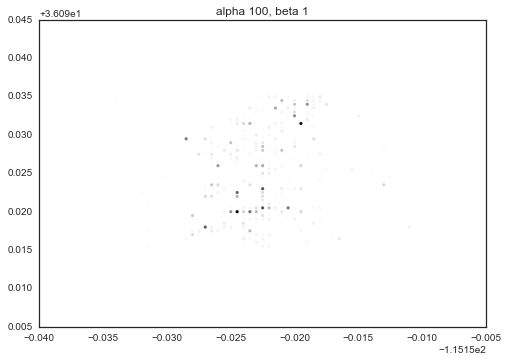

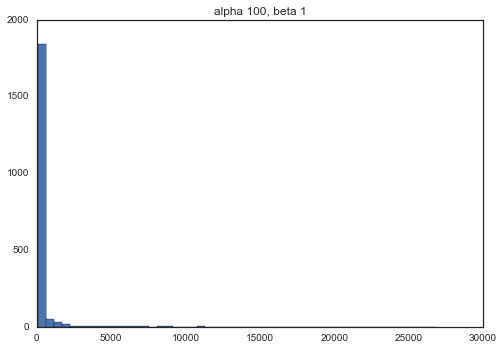

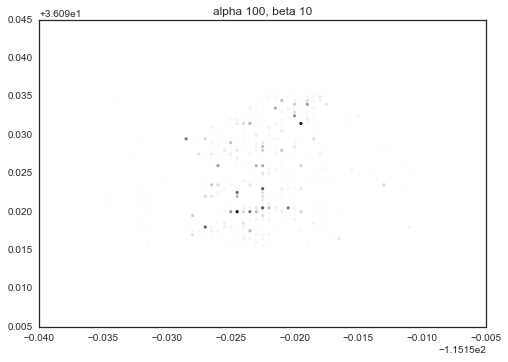

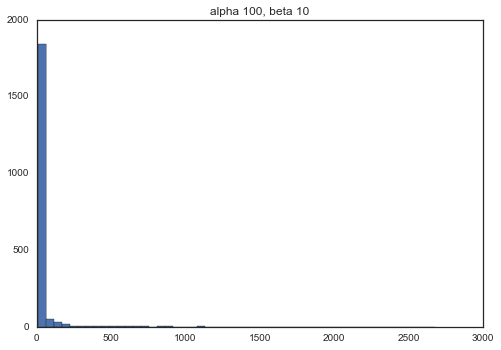

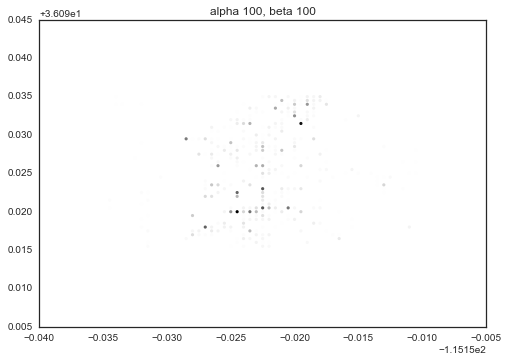

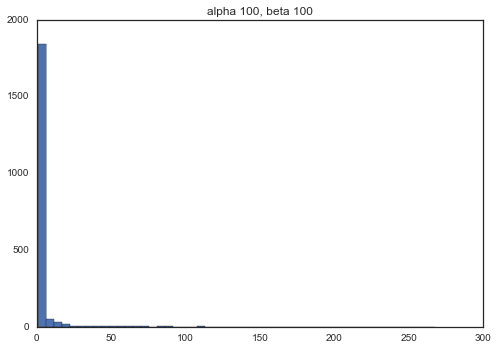

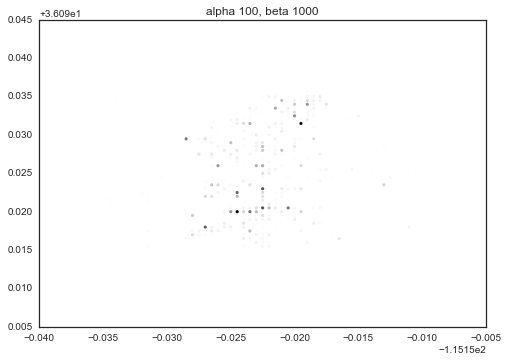

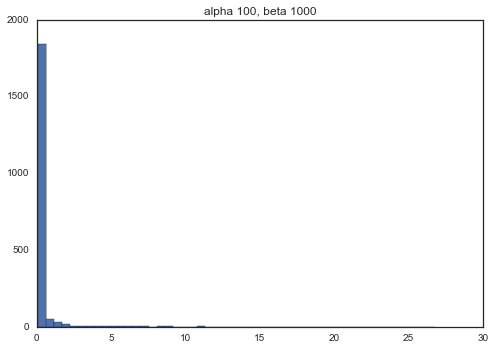

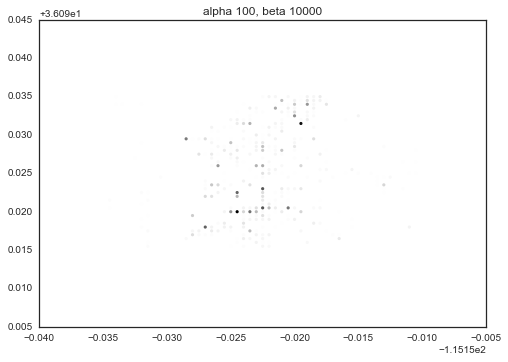

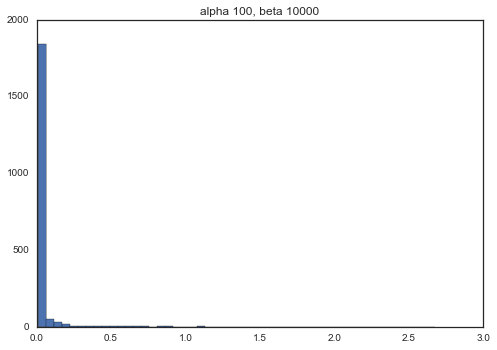

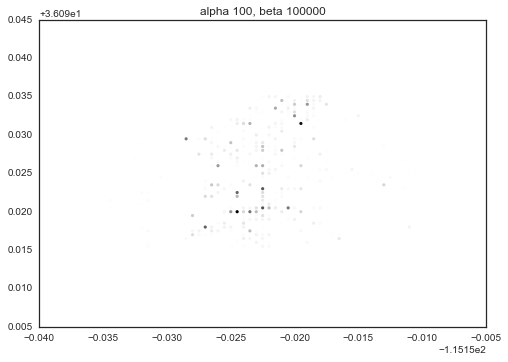

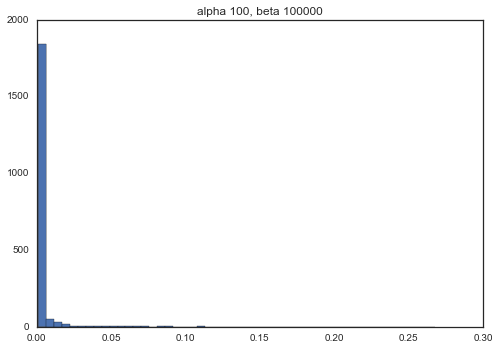

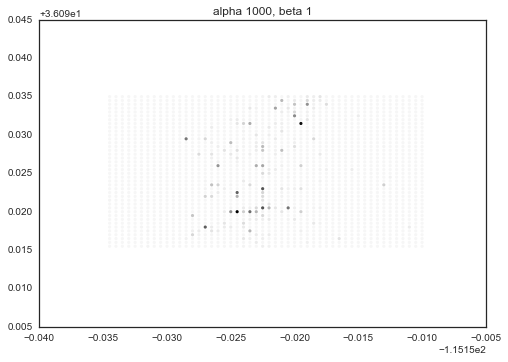

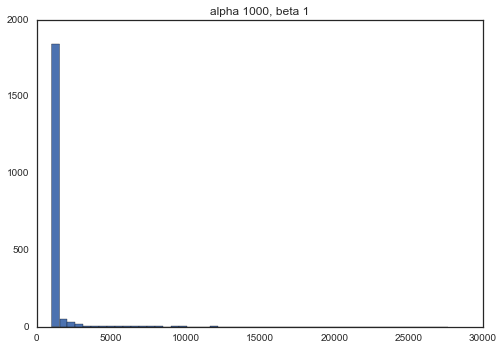

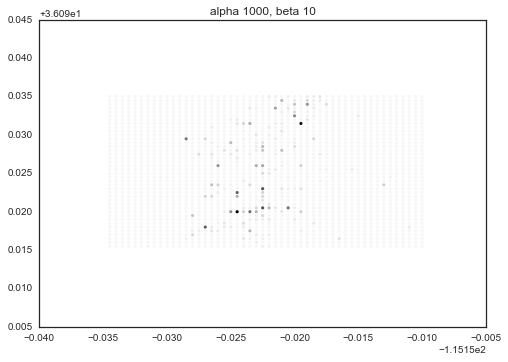

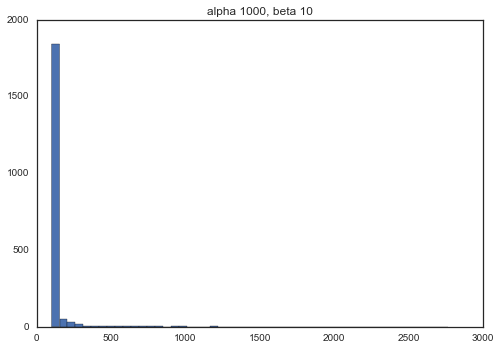

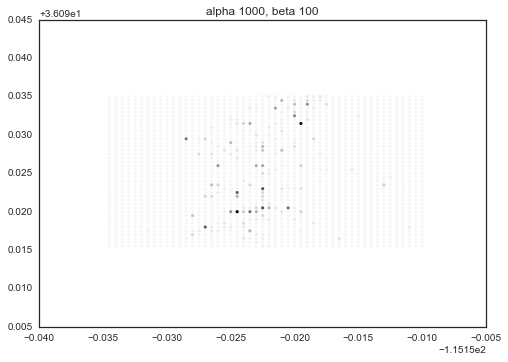

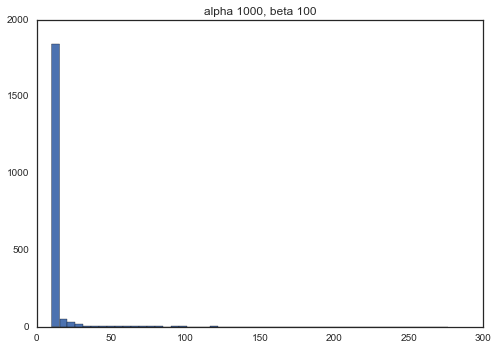

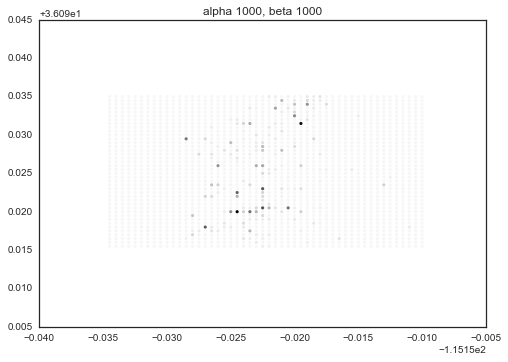

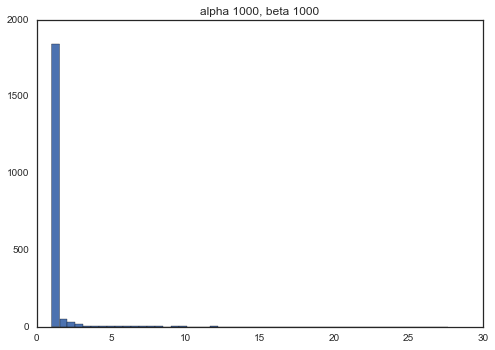

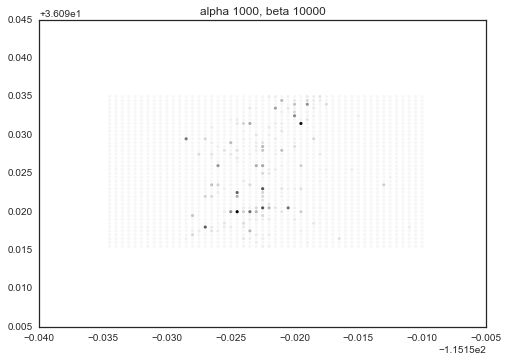

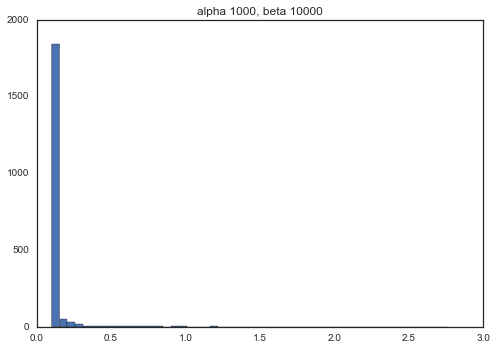

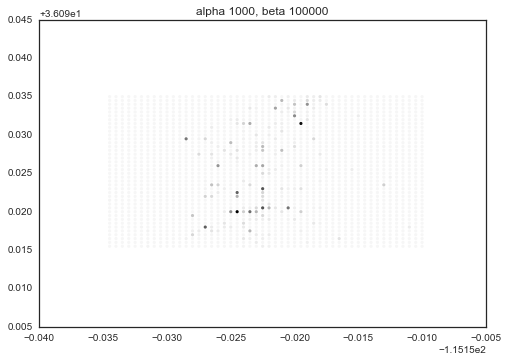

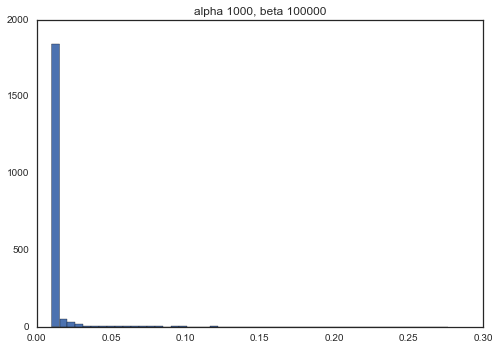

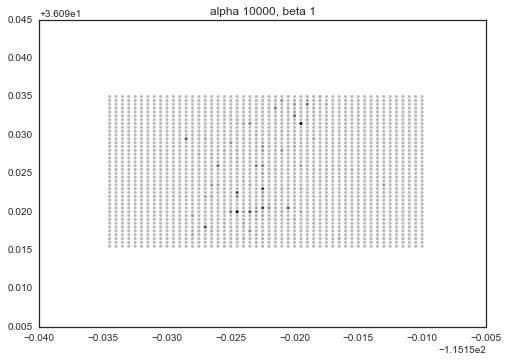

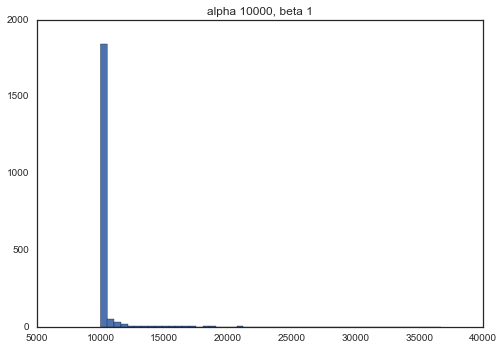

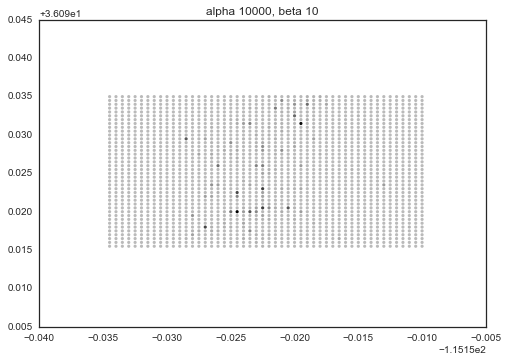

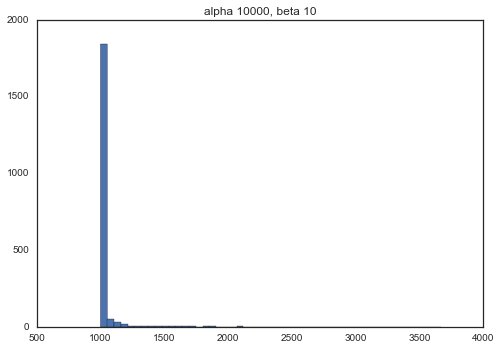

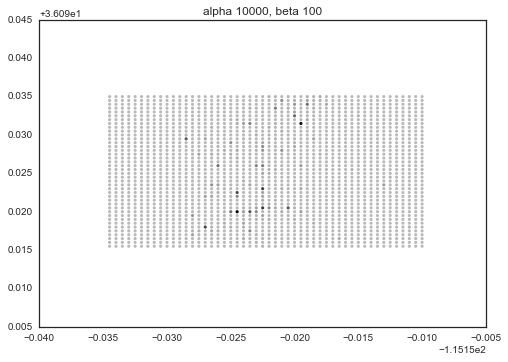

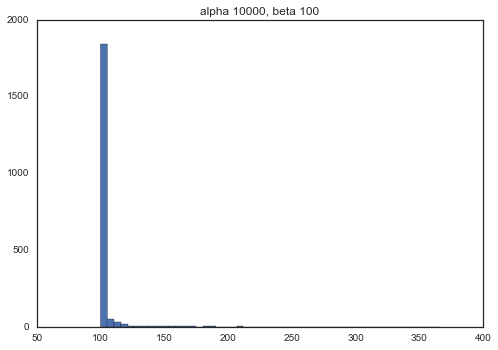

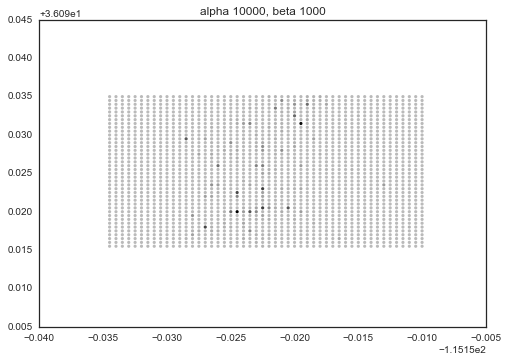

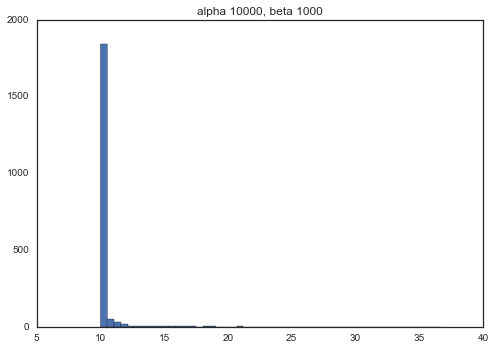

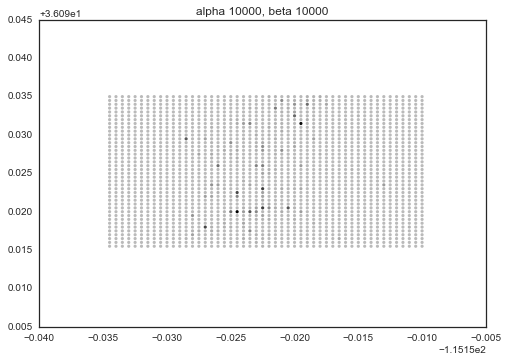

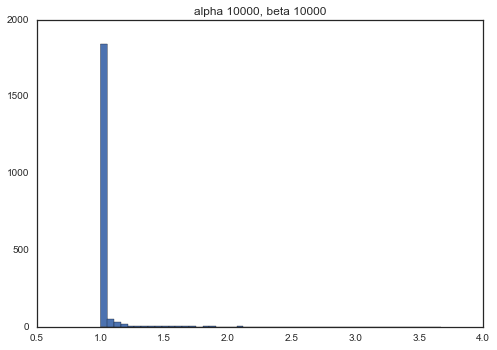

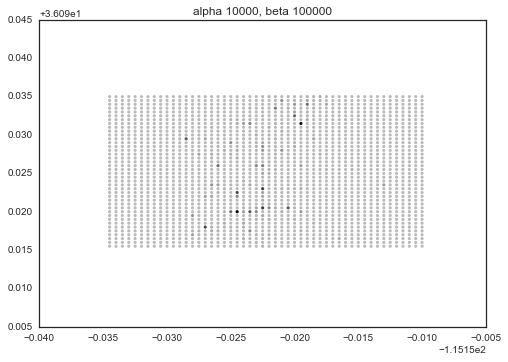

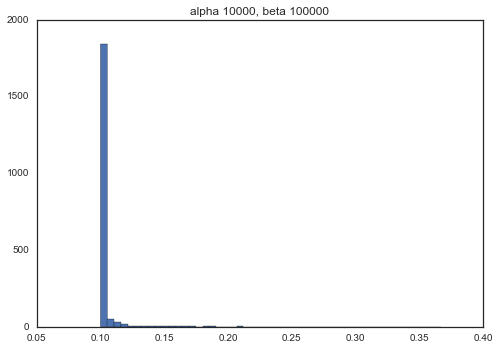

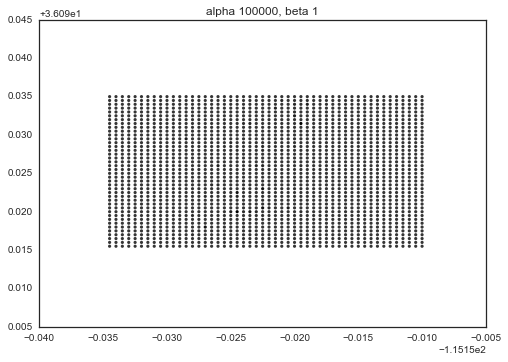

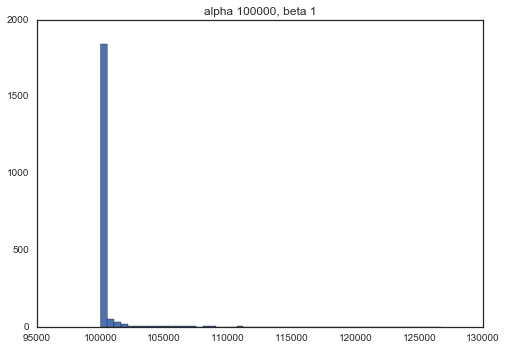

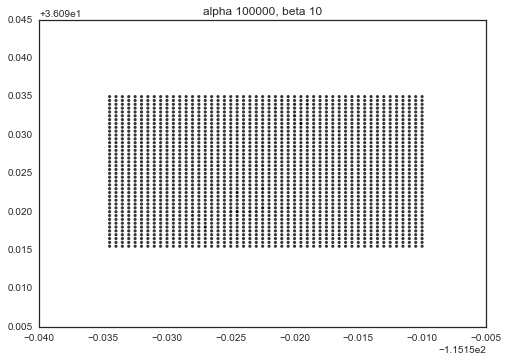

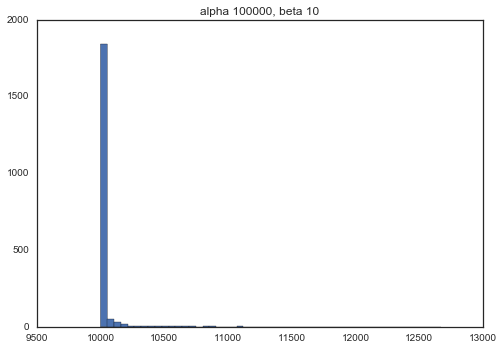

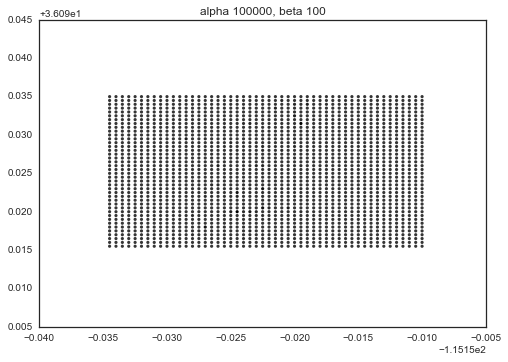

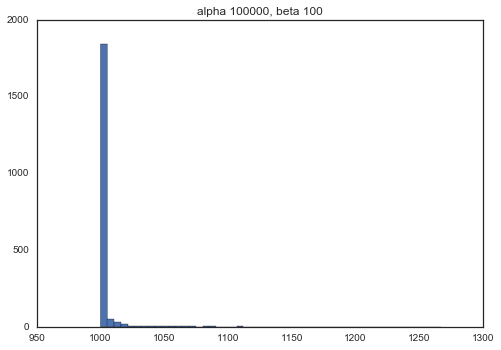

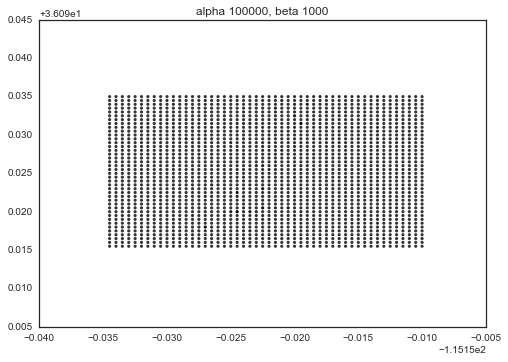

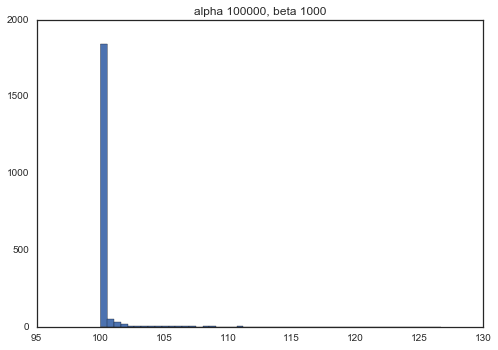

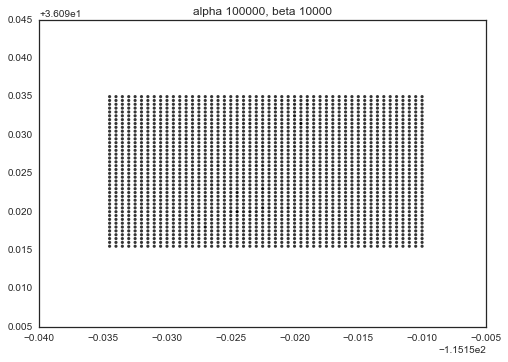

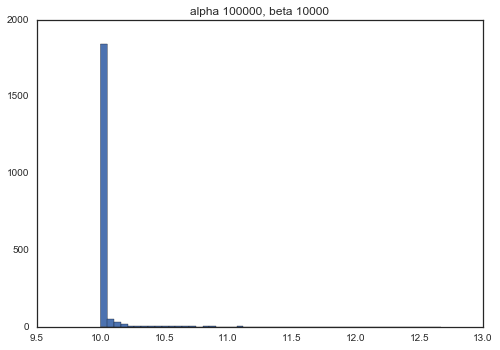

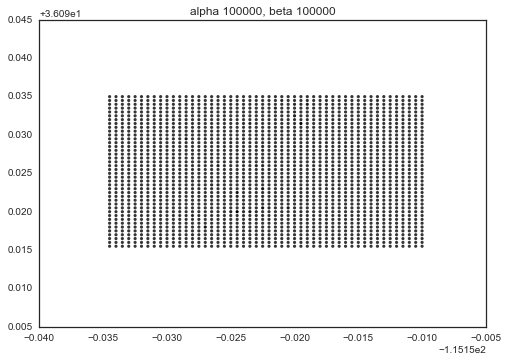

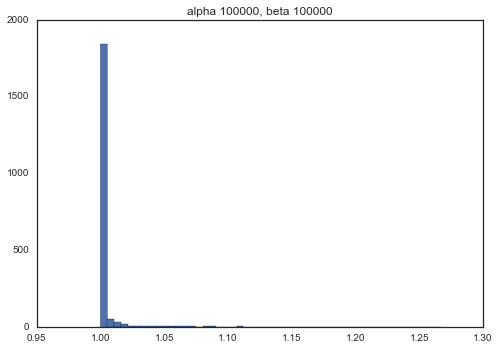

In [266]:
alphas = [0.1, 1, 5, 10, 100, 1000, 10000, 100000]
betas = [1, 10, 100, 1000, 10000, 100000]

for alpha in alphas:
    for beta in betas:
        lambdas = [(alpha + yi) * 1.0 / (beta + w**2) for yi in checkins]
        plot_checkins(lambdas, "alpha "+str(alpha)+", beta "+str(beta))
        plt.figure()
        plt.title("alpha "+str(alpha)+", beta "+str(beta))
        plt.hist(lambdas, bins = 50);

<div class="alert alert-danger">
Note: I tweaked the `vmin` setting in the original plot function, which produces a slightly different plot for the low population areas.
</div>

<div class="alert alert-info">
(Before changing the `vmin` parameter:) Visually, the plots are not super helpful as they all look pretty similar. We graphed some histograms for the lambdas to try to better assess the situation, as well as the histogram of the checkin counts. Note that because most of the checkins are relatively small, the denominator readily dominates as $\beta$ gets larger, and we can see most of the values on the x-axis shrink, although the visual pattern is maintained. When $\alpha$ is large compared to the number of checkins, then $\alpha$ will dominate the numerator, but the visual pattern is still maintained (assuming the plotting function provides different shades so long as the values are unique). Therefore, the graphs are generally simply rescaled, but it seems little is added to the visual plot beyond what the data provides. <br><br>

Note, however, that when we prevent re-scaling (vmin = 0), we can see what actually happens when alpha (in the numerator) dominates -- as alpha becomes large relative to the denominator, it assigns a large prior value to all of the grid squares. 
</div>

### Non-Conjugate Model
Now let's move on to a slightly more complicated model. Again assume that the grid is discretized into $M$ cells of the same area, and the checkins in cell $i$, denoted by $Y_i$, are distributed according to a $Pois(w^2\lambda_i)$ distribution. However there is a twist: we assume $\lambda_i$ is equivalent to $Exp[\alpha+Z_i]$ where $Z \in \mathbb{R}^{M}$ is drawn from a multivariate normal $MVN(0,\Sigma)$ distribution, where $\Sigma$ comes from a squared exponential kernel, and $\alpha$ is drawn according to a N(0,1) distribution. In this way, the $\lambda_i$ for distinct cells are no longer independent but are correlated.(If you'd like to delve deeper, this process is called a "Log-Gaussian Cox process".)

Describe what the meaning of $\alpha$ and $\Sigma$ is for this model. 

We model $\Sigma$ using a square exponential kernel such that the covariances decay exponentially quickly as points get further apart from each other. That is $$\Sigma_{ij} = Exp[-||X_i-X_j||_2^2/\phi]$$

Where $X_i$ and $X_j$ are the $ith$ and $jth$ rows of $X$ respectively. Describe in which way the choice of $\phi$ influences the kernel. By default, use $\phi = .00001$. 

To simplify your code, consider the prior parameters/latent variables ($\alpha$, $Z$) jointly as a vector in $\mathbb{R}^{M+1}$. Determine the covariance matrix for the multivariate normal prior on this vector and store it all together in a variable called Sigma. Give a short explanation why we can do this. 
When you implement the computation of $\Sigma$, small numerical instabilities can lead to a covariance matrix that is not positive-semidefinite. You can check this by attempting a Cholesky decomposition of $\Sigma$ with numpy. If it throws an error, you can add a small offset to the diagonal of the matrix to help with numerical stability. 

We will provide you with code for an elliptical slice sampler for this problem. This sampling method was directly devloped for problems like this and we will discuss it later in class. For now it is sufficient for you to use the code, without neccessarily understanding it. Use the provided sampler to estimate the posterior mean for this non-conjugate model. In addition implement the model also in PYMC or vanilla Metropolis Hastings, and compare the result. 

Finally discuss the differences in results from the conjugate and the non-conjugate model and which one you would prefer. 

<div class="alert alert-info">
<h2>Answer</h2>
<p>References: https://www.cs.toronto.edu/~hinton/csc2515/notes/gp_slides_fall08.pdf
</div> 

First, we build $\Sigma$, which is the covariance matrix of our prior. From the formula above:

$$
\begin{aligned}
\Sigma_{ij} &= Exp[\frac{-||X_i-X_j||_2^2}{\phi}] \\
&= Exp[- \frac{(\Delta latitude)^2 + (\Delta longitude)^2}{\phi}]
\end{aligned}
$$

In [268]:
# Sigma will be of dimension M x M
Sigma = np.zeros((M, M))
assert X.shape[0] == M  # each cell should be represented as a row in X

phi = .00001

for i in xrange(M):
    for j in xrange(M):
        Sigma[i, j] = np.exp(-1.0 * ((X[i, 0] - X[j, 0])**2 + (X[i, 1] - X[j, 1])**2) / phi)

Sigma

array([[  1.00000000e+00,   9.75309912e-01,   9.04837418e-01, ...,
          1.16881313e-41,   1.79243298e-42,   2.61472518e-43],
       [  9.75309912e-01,   1.00000000e+00,   9.75309912e-01, ...,
          7.24990824e-41,   1.16881313e-41,   1.79243298e-42],
       [  9.04837418e-01,   9.75309912e-01,   1.00000000e+00, ...,
          4.27764968e-40,   7.24990824e-41,   1.16881313e-41],
       ..., 
       [  1.16881313e-41,   7.24990824e-41,   4.27764968e-40, ...,
          1.00000000e+00,   9.75309912e-01,   9.04837418e-01],
       [  1.79243298e-42,   1.16881313e-41,   7.24990824e-41, ...,
          9.75309912e-01,   1.00000000e+00,   9.75309912e-01],
       [  2.61472518e-43,   1.79243298e-42,   1.16881313e-41, ...,
          9.04837418e-01,   9.75309912e-01,   1.00000000e+00]])

In [269]:
Sigma.shape

(2000, 2000)

In [270]:
# tack on contribution of alpha (noise) to Sigma
# we add a 1 at (0, 0) and 0 for the remaining elements in the 0th row and 0th column of 0-indexed Sigma
# we can do this because Z and alpha are independent (variance of alpha is 1, no correlation with cells)

# add a column of 0's to the beginning of Sigma
tempcol = np.zeros(M)
Sigma_star = np.column_stack((tempcol, Sigma))

# add a row of 0's to the top of it
temprow = np.zeros(M+1)
Sigma_star = np.row_stack((temprow, Sigma_star))

# change upper left entry to 1
Sigma_star[0, 0] = 1.0

Sigma_star

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   9.75309912e-01, ...,
          1.16881313e-41,   1.79243298e-42,   2.61472518e-43],
       [  0.00000000e+00,   9.75309912e-01,   1.00000000e+00, ...,
          7.24990824e-41,   1.16881313e-41,   1.79243298e-42],
       ..., 
       [  0.00000000e+00,   1.16881313e-41,   7.24990824e-41, ...,
          1.00000000e+00,   9.75309912e-01,   9.04837418e-01],
       [  0.00000000e+00,   1.79243298e-42,   1.16881313e-41, ...,
          9.75309912e-01,   1.00000000e+00,   9.75309912e-01],
       [  0.00000000e+00,   2.61472518e-43,   1.79243298e-42, ...,
          9.04837418e-01,   9.75309912e-01,   1.00000000e+00]])

In [271]:
Sigma_star.shape  # should be (M + 1) x (M + 1) dimensions

(2001, 2001)

In [272]:
# test for positive definiteness
np.linalg.cholesky(Sigma_star)

LinAlgError: Matrix is not positive definite

In [273]:
Sigma_star += 0.0001 * np.eye(M + 1)

In [274]:
np.linalg.cholesky(Sigma_star)

array([[  1.00005000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00005000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   9.75261150e-01,   2.21281922e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   1.16875469e-41,   2.76121391e-40, ...,
          1.59479923e-02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.79234337e-42,   4.49206530e-41, ...,
          1.32031747e-02,   1.69378764e-02,   0.00000000e+00],
       [  0.00000000e+00,   2.61459445e-43,   6.94788680e-42, ...,
          1.25706419e-02,   1.68842341e-02,   2.12570934e-02]])

In [ ]:
# Can also use this to search for a smaller/bigger offset
# Attempt Cholesky Decomposition (returns error if unsuccessful)
# http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.cholesky.html
# 
# tempSigma = Sigma_star
# 
# for i in np.linspace(0, 1, num=1000, endpoint=False):
#    try:
#        np.linalg.cholesky(tempSigma)
#        print "success"
#        print tempSigma
#        break
#    except:
#        tempSigma = Sigma_star
#        # add small offset to each diagonal element
#        print "trying ", i
#        offset = np.zeros(((M+1),(M+1)))
#        np.fill_diagonal(offset, i)
#        tempSigma = np.add(Sigma_star, offset)

<div class="alert alert-info">
Next, we define the log likelihood to feed into the slice sampler function.
</div>

In [275]:
def log_likelihood(f, Y):
    
    logsums = np.sum(scipy.stats.poisson.logpmf(Y, w**2 * np.exp(f[0] + f[1:])))
    
    # looping was too slow!!!   
    # logsums = 0
    #
    # for i in xrange(M):
    #    x = Y[i]
    #    
    #    alpha = f[0]  # always the first element
    #    z_i = f[i + 1]  # pick off the right Z
    #    
    #    lambda_i = np.exp(alpha + z_i)
    #    mu_i = lambda_i * w**2  
    #    
    #    logsums += scipy.stats.poisson.logpmf(x, mu_i)

    return logsums

In [277]:
# elliptical slice sampler (Murray, Adams, and MacKay JMLR 2010)
# Inputs:
# Y: observed data
# Sig: covariance matrix of the prior
# log_lik: the log likelihood function
# N_mcmc: number of desired samples
# burn_in: number of burn in iterations
# N: dimensionality of the input, this should be M+1 because alpha is part of Sigma

# returns an array of samples of size N_mcmc x N

import sys
    
def ess(Y, Sig,log_lik, N_mcmc, burn_in, N):
    print 'running elliptical slice sampling...'
    mcmc_samples = np.zeros((N_mcmc+burn_in, N))
    norm_samples = np.random.multivariate_normal(np.zeros(N), Sig, N_mcmc+burn_in)
    unif_samples = np.random.uniform(0,1,N_mcmc+burn_in)
    theta = np.random.uniform(0,2*np.pi,N_mcmc+burn_in)
    theta_min = theta-2*np.pi
    theta_max = theta+2*np.pi
    for i in range(1,N_mcmc+burn_in):
        if i % 20000 == 0:
            print "iteration", i; sys.stdout.flush()
        f = mcmc_samples[i-1,:]
        llh_thresh = log_lik(f,Y) + np.log(unif_samples[i])
        f_star = f*np.cos(theta[i])+norm_samples[i,:]*np.sin(theta[i])
        while log_lik(f_star,Y) < llh_thresh:
            if theta[i] < 0:
                theta_min[i] = theta[i]
            else:
                theta_max[i] = theta[i]
            theta[i] = np.random.uniform(theta_min[i],theta_max[i],1)  
            f_star = f*np.cos(theta[i])+norm_samples[i,:]*np.sin(theta[i])
        mcmc_samples[i,:] = f_star
    return mcmc_samples[(burn_in+1):(burn_in+N_mcmc),]

essvec = ess(checkins, Sigma_star, log_likelihood, 51000, 1000, M+1)

running elliptical slice sampling...
iteration 20000
iteration 40000


In [278]:
essvec_avg = np.mean(essvec, axis=0)
essvec_avg

array([ 16.51635003,  -1.89938952,  -1.9401963 , ...,  -2.70813138,
        -2.40410518,  -2.06916964])

In [279]:
ess_lambda_i = np.exp(essvec_avg[0] + essvec_avg[1:])
ess_lambda_i * w**2

array([ 0.55719255,  0.53491298,  0.60384713, ...,  0.24818365,
        0.33636444,  0.47018712])

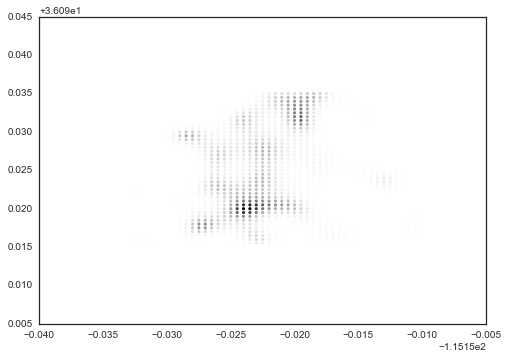

In [280]:
plot_checkins(ess_lambda_i)

<div class="alert alert-info">
Looks similar to the above diagram with some slightly darker shading near the original points, which appear to take into account the higher probability of having greater counts in locations near existing larger counts. <br><br>

Now, let's implement this in PyMC: 
</div>

In [281]:
inv_Sigma = scipy.linalg.inv(Sigma_star)  # MvNormal requires us to feed in the inverse

In [289]:
draw = pm.MvNormal("draw", mu=np.zeros(M+1), tau=inv_Sigma)  # need to invert

# this is a log likelihood
@pm.observed
def likelihood(value=checkins, draw=draw):
    lambdas = np.exp(draw[0] + draw[1:])
    # similar form to previously defined likelihood provided to the ESS sampler
    logsums = np.sum(scipy.stats.poisson.logpmf(value, w**2 * lambdas))                                    
    return logsums

# sample
model = pm.Model([draw])
mcmc = pm.MCMC(model)
mcmc.sample(iter=60000, burn=10000)  # we fiddled with some of these parameters

 [-----------------100%-----------------] 60000 of 60000 complete in 4797.3 sec

In [290]:
combo_avg = np.mean(draw.trace(), axis=0)
combo_avg

array([ 20.63386776,  -0.42486201,  -0.09298759, ...,   0.02267846,
         0.23811566,   0.60749303])

In [291]:
combo_avg.shape

(2001,)

In [292]:
lambdaest = np.exp(combo_avg[0] + combo_avg[1:])
lambdaest

array([  5.97942858e+08,   8.33279909e+08,   8.00662436e+08, ...,
         9.35457449e+08,   1.16034524e+09,   1.67882636e+09])

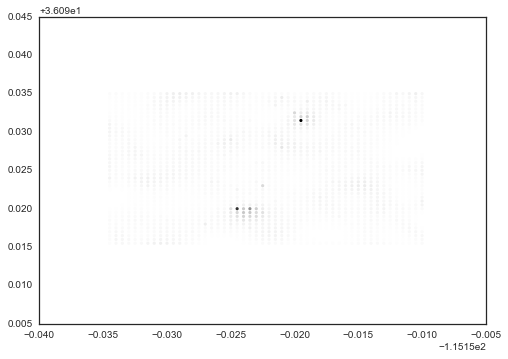

In [293]:
plot_checkins(lambdaest)

<div class="alert alert-danger">
Note: I tweaked the `vmin` setting in the original plot function, which produces a slightly different plot for the low population areas.
</div>

<div class="alert alert-info">
Some answers to questions posed:
<ul> 
<li> "Describe what the meaning of $\alpha$ and $\Sigma$ is for this model": $\alpha$ appears to be the noise parameter, whose value is added to the value of the unobserved latent variable $Z_i$. $\Sigma$ is the covariance matrix which effectively encodes the correlation in checkins between two points on the grid; the formula calculates the distances between two points, and the entries in $\Sigma$ are set such that squares which are close in geographical distance are expected to be similar in terms of checkins, while squares that are far apart tend to be dissimilar in this aspect.
<li> "Describe in which way the choice of $\phi$ influences the kernel": $\phi$ allows for an adjustment on how the distances will affect the value of the covariances between two grid squares; in particular, the covariance between two grid squares will depend on how close in magnitude of $\phi$ is to the magnitude of the distance (and thus the units of the distance). Therefore, a value of $\phi$ that is too high or too low will cause spurious results. More technically, this parameter "gives the overall lengthscale in dimension-d" for the kernel, and "the typical distance between peaks" is approximately $\phi$: (https://www.cs.toronto.edu/~hinton/csc2515/notes/gp_slides_fall08.pdf)
<li> "Determine the covariance matrix for the multivariate normal prior on this vector and store it all together in a variable called Sigma. Give a short explanation why we can do this": We assume the noise parameter $\alpha$ is independent of the particular value of the unobserved latent variable $Z_i$, hence why it is considered as "noise" in the modeling of each lambda.
<li> "Discuss the differences in results from the conjugate and the non-conjugate model and which one you would prefer": The non-conjugate model seems more realistic and is thus more preferable; the trade-off is complexity - the conjugate model has an exact derivable analytical solution given the use of the conjugate prior and can be evaluated more quickly. However, this does not mean the model is either more accurate nor informative.
</div>

# Problem 2: Point Matching

In this problem you are given two point clouds `points1` and `points2`. Your task is to estimate an affine transformation which can map the points of `points1` onto the points of `points2`. Unfortunately you don't know which points from the two point sets correspond to each other.

We are modeling the correspondences in a correspondence matrix $M$, which is of size $n_1 \times n_2$ where $n_i$ is the number of points in point set $i$. $M_{ij}=1$ indicates that point $x_i$ from `points1` and $y_j$ from `points2` correspond to each other. Each point is only allowed to have one correspondence. So for all $i$ we have $\sum_l^{n_2} M_{il} = 1$ 

The likelihood for this problem is:

$$ \prod_i^{n_1} \prod_j^{n_2} \varphi_{0,\sigma}\left(||Ax_i - y_j||^2\right)^{M_{ij}} $$

where $\varphi_{0,\sigma}$ is a normal distribution with mean 0 and variance $\sigma^2$. We use $\sigma^2 = 0.1$ as a default for this problem. 

Estimate the affine transform $A$ that matches the two point sets using expectation maximization and simulated annealing and compare the results. What are the strength of each algorithm? Which one would you prefer in which scenario?

Here are some hints that should be useful:
* The M-step of the problem will be a weighted least squares solution. 
* To use linear algebra to solve the M step it is useful to extend the point matrices to contain all possible pairwise correspondence pairs. 
* The weights for the weighted least squares should be updated in your E-step

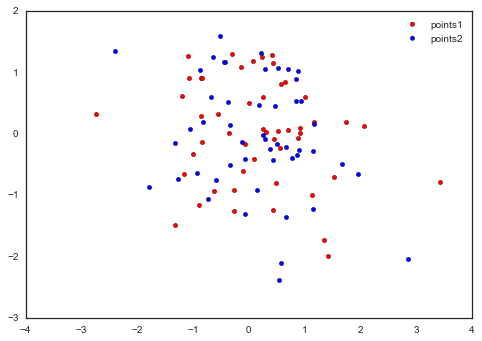

In [163]:
points1 = np.array([[-0.855,  0.905,  1.   ],[ 1.417, -1.999,  1.   ],[-0.896, -1.166,  1.   ],[-0.114, -0.604,  1.   ],
                    [ 2.055,  0.131,  1.   ],[ 0.694,  0.056,  1.   ],[-1.318, -1.495,  1.   ],[ 0.479, -0.799,  1.   ],
                    [-1.081,  0.91 ,  1.   ],[-0.273, -1.258,  1.   ],[ 1.733,  0.188,  1.   ],[ 0.65 ,  0.848,  1.   ],
                    [-0.007,  0.507,  1.   ],[-0.262, -0.922,  1.   ],[-0.14 ,  1.078,  1.   ],[ 0.239,  1.246,  1.   ],
                    [ 0.528,  0.036,  1.   ],[ 0.31 ,  0.025,  1.   ],[-2.734,  0.325,  1.   ],[ 1.014,  0.597,  1.   ],
                    [-0.839, -0.137,  1.   ],[ 0.924,  0.012,  1.   ],[ 0.09 , -0.407,  1.   ],[ 0.433, -1.236,  1.   ],
                    [ 1.345, -1.731,  1.   ],[-0.362,  0.012,  1.   ],[ 0.416,  1.279,  1.   ],[ 1.165,  0.185,  1.   ],
                    [ 0.446, -0.088,  1.   ],[-1.006, -0.335,  1.   ],[ 0.072,  1.188,  1.   ],[ 0.25 ,  0.076,  1.   ],
                    [ 1.525, -0.699,  1.   ],[ 0.574,  0.805,  1.   ],[-1.171, -0.655,  1.   ],[ 0.873, -0.067,  1.   ],
                    [-0.306,  1.291,  1.   ],[-0.07 , -0.174,  1.   ],[-1.088,  1.27 ,  1.   ],[-0.864,  0.295,  1.   ],
                    [-0.845,  0.914,  1.   ],[ 1.136, -1.001,  1.   ],[-0.55 ,  0.328,  1.   ],[-1.201,  0.621,  1.   ],
                    [-0.617, -0.941,  1.   ],[ 0.438,  1.147,  1.   ],[ 0.252,  0.593,  1.   ],[ 3.42 , -0.792,  1.   ],
                    [ 0.923,  0.096,  1.   ],[ 0.563, -0.235,  1.   ]])

points2 = np.array([[-0.131, -0.134,  1.   ],[-2.402,  1.347,  1.   ],[ 0.137, -0.921,  1.   ],[ 0.581, -2.113,  1.   ],
                    [ 0.283,  1.049,  1.   ],[-0.734, -1.058,  1.   ],[ 0.26 , -0.025,  1.   ],[ 0.296, -0.095,  1.   ],
                    [ 0.211,  1.31 ,  1.   ],[ 0.874,  1.023,  1.   ],[-0.336, -0.515,  1.   ],[ 0.859, -0.343,  1.   ],
                    [-0.073, -1.308,  1.   ],[-1.058,  0.075,  1.   ],[ 0.544, -2.389,  1.   ],[-0.827,  0.195,  1.   ],
                    [ 0.666, -1.36 ,  1.   ],[ 0.698,  1.059,  1.   ],[-1.274, -0.734,  1.   ],[-0.52 ,  1.589,  1.   ],
                    [ 1.141, -1.229,  1.   ],[ 0.89 , -0.265,  1.   ],[ 0.521,  1.07 ,  1.   ],[-0.651,  1.254,  1.   ],
                    [-0.686,  0.603,  1.   ],[ 0.502, -0.169,  1.   ],[ 0.925,  0.535,  1.   ],[-0.93 , -0.634,  1.   ],
                    [-0.33 ,  0.149,  1.   ],[-0.431,  1.168,  1.   ],[ 0.43 , -0.433,  1.   ],[ 1.949, -0.665,  1.   ],
                    [-0.872,  1.033,  1.   ],[ 0.378, -0.252,  1.   ],[-1.79 , -0.877,  1.   ],[ 0.781, -0.396,  1.   ],
                    [ 1.147, -0.275,  1.   ],[-0.073, -0.41 ,  1.   ],[ 1.673, -0.489,  1.   ],[-1.332, -0.157,  1.   ],
                    [-0.444,  1.163,  1.   ],[ 0.459,  0.452,  1.   ],[ 0.843,  0.892,  1.   ],[ 0.662, -0.214,  1.   ],
                    [ 0.838,  0.524,  1.   ],[ 0.188,  0.471,  1.   ],[ 1.166,  0.164,  1.   ],[-0.595, -0.751,  1.   ],
                    [-0.382,  0.514,  1.   ],[ 2.857, -2.04 ,  1.   ]])

plt.scatter(points1[:,0], points1[:,1], c='r', label='points1')
plt.scatter(points2[:,0], points2[:,1], c='b', label='points2')
plt.legend()
plt.show()

### Simulated Annealing

<div class="alert alert-info">
We note from the above question that we want to minimize the sum of distances between successive points; this in turn will result in an increased likelihood because $\varphi_{0,\sigma}$ is a normal distribution with mean 0. So the general approach we take is to define $\sum_i^{n_1} ||x_i A - y_i||^2$ as our objective function which we are trying to minimize. If our A is correct, and it minimizes our objective function, A will be given by $(X^TX)^{-1}X^TY$. Therefore, let us calculate an A in this manner, compute our objective function, change the permutation of the rows of one of our matrices (e.g. X), repeat the computation of our objective function, and repeat; when we have minimized the objective function, we will have attained an A. Note, however, that while simulated annealing in theory will converge to a global optimum with infinite time, practically we cannot guarantee having found more than a local optimum within a limited amount of time.
</div>

In [3]:
N = points1.shape[0]
assert points1.shape[0] == points2.shape[0]

In [296]:
def objective_function(X, Y):
    # assume we have right A; therefore A = (X^T X)^-1 (X^T, Y)
    # X is an n x 3 matrix, Y is an n x 3 matrix
    Ahat = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    
    d = 0
    for i in xrange(N):
        # note minimizing the distance is equivalent to minimizing the squared norm
        # squared_norm += np.linalg.norm(np.dot(X[i,], Ahat) - Y[i,])**2 
        d += np.linalg.norm(np.dot(X[i,], Ahat) - Y[i,])  
        
    return d, Ahat

In [297]:
objective_function(points1, points2)

(57.264935536012253,
 array([[ -1.47242124e-01,  -8.66195459e-02,   1.12757026e-17],
        [ -3.86946590e-02,   1.45776287e-02,  -2.81892565e-18],
        [  1.59621343e-01,  -3.95459571e-02,   1.00000000e+00]]))

In [27]:
def swap_coords(M, L=1):
    # takes in a matrix M (e.g. could be X or Y, we use X)
    # select two rows randomly to swap
    # return matrix with swapped elements, to use as proposal for simulated annealing
    # L is the step size (# of swaps before returning)
    
    M_prime = M.copy()  # don't want to change M by mistake
    row1 = None
    row2 = None
    for i in xrange(L):
        # choose two rows - there are many ways to do this; I picked two indices
        row1, row2 = np.random.choice(N, size=2, replace=False)
        
        temp = M_prime[row1,].copy()
        M_prime[row1,] = M_prime[row2,].copy()
        M_prime[row2,] = temp
    
    return (M_prime, row1, row2)    

In [299]:
import sys

In [243]:
def sa(X, Y, init_temp, thermostat, ftol, itol, otol, reannealing, k=1): 
    
    # Reference: re-used code from solution of knapsack problem
        
    obj_values = []  # stores objective function values from successive runs
    curr_X = X.copy()
    
    min_obj_value = np.inf  # store best objective function seen so far
    best_A = np.zeros((3, 3))  # store corresponding best matrix
    
    m = 200 # iterations before checking function tolerance (tried various settings)
    it = 0 # acceptances counter
    atp = 0 # total number of iterations
    
    prev_E, curr_A = objective_function(curr_X, Y)  # initial "energy"
    temperature = init_temp
        
    while True:
          
        # if atp % 100000 == 0:
        #    print "running iteration ", atp; sys.stdout.flush()
            
        # L = np.floor(temperature).astype(int)  # alternative step size
        L = np.floor(np.exp(temperature)).astype(int)  # alternative step size
        # L = np.floor(np.sqrt(temperature)).astype(int) + 1  # step size
        # L = np.floor(np.log(temperature)).astype(int)  # alternative step size
        
        propose_X, _, _ = swap_coords(curr_X, L)  # could swap Y's rows as an alternative
        
        new_E, curr_A = objective_function(propose_X, Y)
        delta_E = new_E - prev_E
        
        if (delta_E < 0) or (np.random.rand() < np.exp(-delta_E/temperature)):
        # if (delta_E < 0) or (np.random.rand() < np.exp(-delta_E/k*temperature)):
            # accept proposal
            curr_X = propose_X
            obj_values.append(new_E)
            prev_E = new_E
            it += 1
            
            # keep track of best A
            if new_E < min_obj_value:
                min_obj_value = new_E
                best_A = curr_A
            
        atp += 1
        
        # determine when to reheat
        if (it % reannealing) == 0:
            temperature = thermostat * temperature      
            # if temperature < 1:
                #reheat
                # temperature = 100

        # termination conditions
        if (len(obj_values) > m) and np.std(obj_values[-m:])/np.mean(obj_values[-m:]) < ftol: 
            print 'ftol: convergence', min_obj_value
            break
        if atp > itol:
            print 'itol: maximum iterations reached'
            break
        # if ______  <= otol:
        #    print 'otol: _______ ' 
        #    break

    plt.figure()
    plt.plot(obj_values)
    plt.title("Objective function")
    
    return best_A, min_obj_value, curr_X

<div class="alert alert-info">
Ultimately, after repeatedly tweaking reheating/non-reheating settings, and the step size, in addition to starting parameter values, we experienced the most success with an exponential step size, and no reheating.
</div>

run 0
ftol: convergence 20.0333849971
run 1
ftol: convergence 19.0524319583
run 2
ftol: convergence 18.0929319698
run 3
ftol: convergence 16.2331510018
run 4
itol: maximum iterations reached
run 5
ftol: convergence 19.1486455351
run 6
itol: maximum iterations reached
run 7
ftol: convergence 17.3703296209
run 8
ftol: convergence 18.2476369822
run 9
itol: maximum iterations reached
0.0260797598491


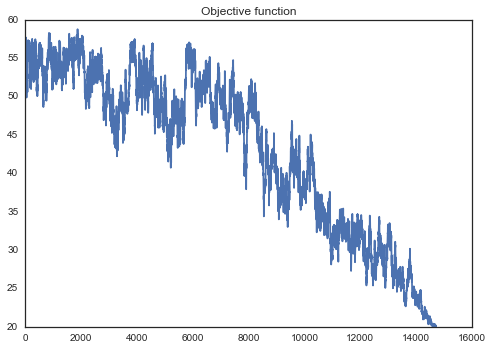

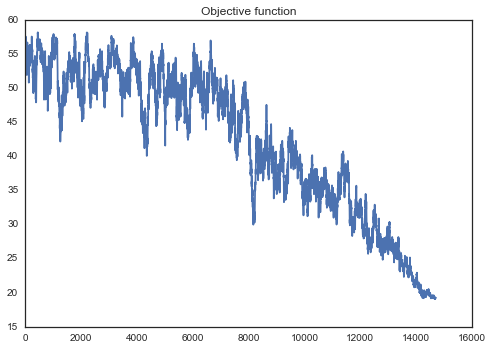

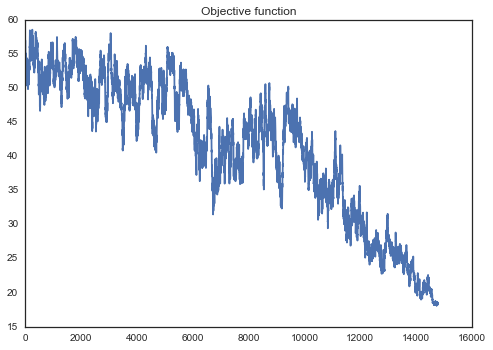

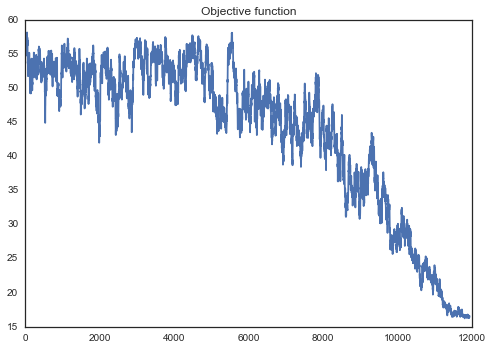

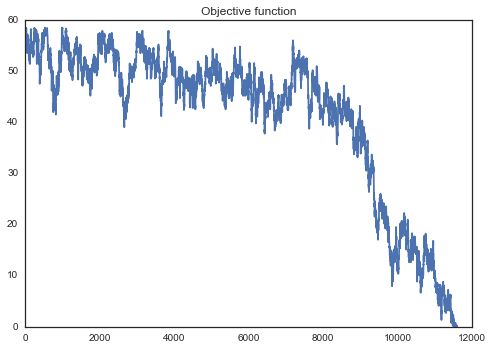

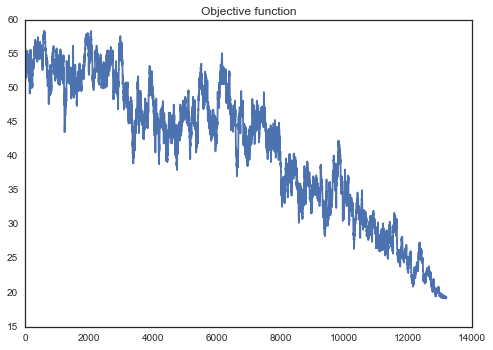

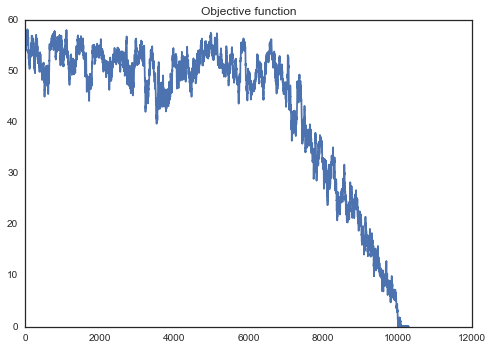

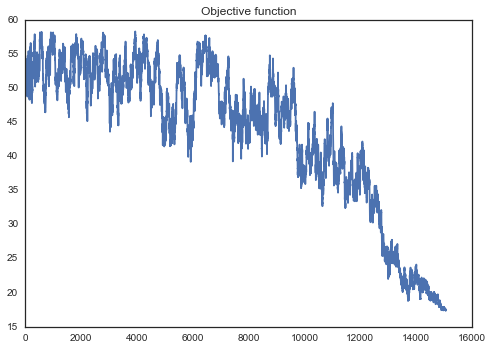

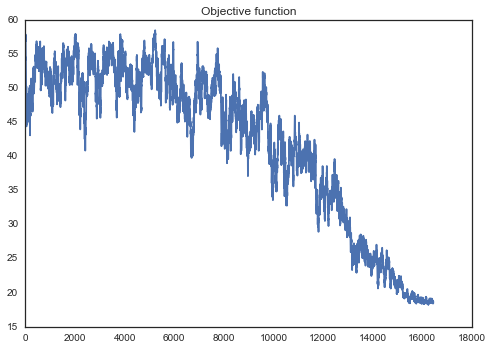

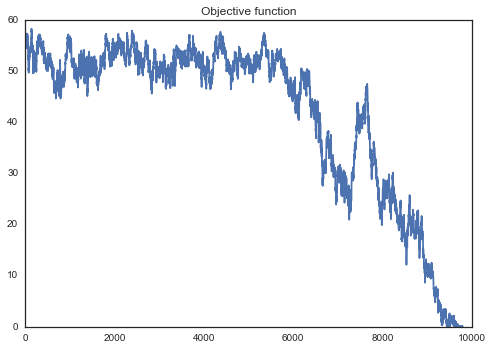

In [252]:
# we fiddled around with these parameters
init_temp = 0.7
thermostat = 0.997 # we played with this
ftol = 0.01
itol = 1000000  # we played with this
otol = 0.
reannealing = 100  # we played with this too
# k = .0001

runs = {}

for i in xrange(10):
    print "run", i; sys.stdout.flush()
    np.random.shuffle(points1)  # let's just mix things up first
    final_A, obj, lastX = sa(points1, points2, init_temp, thermostat, ftol, itol, otol, reannealing, k)
    runs[obj] = final_A
    if obj == 0:
        break
    
# print final_A, obj
print np.min(runs.keys())

In [253]:
runs

{0.026079759849133841: array([[  9.23982723e-01,  -3.82589429e-01,   1.12757026e-17],
        [  3.82610186e-01,   9.23838363e-01,  -6.50521303e-19],
        [ -4.90965656e-05,  -4.89620663e-06,   1.00000000e+00]]),
 16.233151001788087: array([[ -7.69797597e-01,  -1.61877027e-01,  -8.67361738e-19],
        [ -6.42171451e-01,   1.00829521e+00,   4.77048956e-18],
        [  2.54015271e-01,  -3.28925106e-02,   1.00000000e+00]]),
 17.370329620931301: array([[  8.39039333e-01,  -5.24670541e-01,   5.20417043e-18],
        [ -1.85237680e-01,  -9.35352775e-01,   2.16840434e-19],
        [  1.49956664e-02,   2.92156441e-02,   1.00000000e+00]]),
 18.092931969816842: array([[  7.80902744e-01,  -6.22591054e-01,   5.20417043e-18],
        [ -3.31359225e-01,  -8.45195936e-01,  -3.46944695e-18],
        [  2.42108880e-02,   4.32372362e-02,   1.00000000e+00]]),
 18.247636982193953: array([[  2.39049215e-01,  -8.61472020e-01,  -1.64798730e-17],
        [  1.06236594e+00,  -1.98919156e-01,   6.93889390e

In [ ]:
# can continue runs with last X matrix used
# final_A, obj, lastX = sa(lastX, points2, init_temp, thermostat, ftol, itol, otol, reannealing, k)

In [301]:
final_A = runs[np.min(runs.keys())]

In [302]:
# calculate
LHS = np.dot(points1, final_A)
RHS = points2

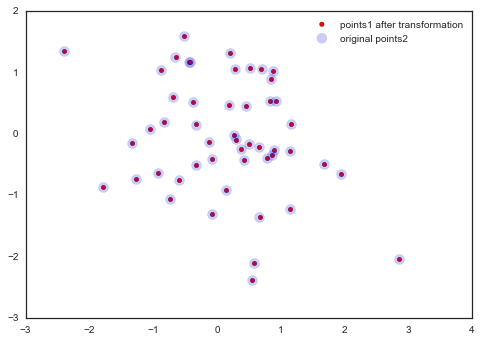

In [303]:
plt.scatter(LHS[:,0], LHS[:,1], c='r', label='points1 after transformation')
plt.scatter(RHS[:,0], RHS[:,1], c='b', label='original points2', s=100, alpha=0.2)
plt.legend()
plt.show()

In [304]:
final_A

array([[  9.23982723e-01,  -3.82589429e-01,   1.12757026e-17],
       [  3.82610186e-01,   9.23838363e-01,  -6.50521303e-19],
       [ -4.90965656e-05,  -4.89620663e-06,   1.00000000e+00]])

<div class="alert alert-info">
Fortunately, our simulated annealing algorithm converged to a very close solution after trying different random starts, and a variety of parameter settings. Note that depending on the application, a local optimum may be "good enough" for a particular purpose when it may not be critical to get the best solution. 
</div>

### Expectation Maximization

In [467]:
#  reset points1 (we shuffled in simulated annealing)
points1 = np.array([[-0.855,  0.905,  1.   ],[ 1.417, -1.999,  1.   ],[-0.896, -1.166,  1.   ],[-0.114, -0.604,  1.   ],
                    [ 2.055,  0.131,  1.   ],[ 0.694,  0.056,  1.   ],[-1.318, -1.495,  1.   ],[ 0.479, -0.799,  1.   ],
                    [-1.081,  0.91 ,  1.   ],[-0.273, -1.258,  1.   ],[ 1.733,  0.188,  1.   ],[ 0.65 ,  0.848,  1.   ],
                    [-0.007,  0.507,  1.   ],[-0.262, -0.922,  1.   ],[-0.14 ,  1.078,  1.   ],[ 0.239,  1.246,  1.   ],
                    [ 0.528,  0.036,  1.   ],[ 0.31 ,  0.025,  1.   ],[-2.734,  0.325,  1.   ],[ 1.014,  0.597,  1.   ],
                    [-0.839, -0.137,  1.   ],[ 0.924,  0.012,  1.   ],[ 0.09 , -0.407,  1.   ],[ 0.433, -1.236,  1.   ],
                    [ 1.345, -1.731,  1.   ],[-0.362,  0.012,  1.   ],[ 0.416,  1.279,  1.   ],[ 1.165,  0.185,  1.   ],
                    [ 0.446, -0.088,  1.   ],[-1.006, -0.335,  1.   ],[ 0.072,  1.188,  1.   ],[ 0.25 ,  0.076,  1.   ],
                    [ 1.525, -0.699,  1.   ],[ 0.574,  0.805,  1.   ],[-1.171, -0.655,  1.   ],[ 0.873, -0.067,  1.   ],
                    [-0.306,  1.291,  1.   ],[-0.07 , -0.174,  1.   ],[-1.088,  1.27 ,  1.   ],[-0.864,  0.295,  1.   ],
                    [-0.845,  0.914,  1.   ],[ 1.136, -1.001,  1.   ],[-0.55 ,  0.328,  1.   ],[-1.201,  0.621,  1.   ],
                    [-0.617, -0.941,  1.   ],[ 0.438,  1.147,  1.   ],[ 0.252,  0.593,  1.   ],[ 3.42 , -0.792,  1.   ],
                    [ 0.923,  0.096,  1.   ],[ 0.563, -0.235,  1.   ]])

In [472]:
# A. Consider all possible correspondences 
## set up X, repeat values so we will have all pairwise combinations between points in X and Y
X_prime = np.array([points1[i] for i in xrange(N) for j in xrange(N)])
X_prime[0:5]

array([[-0.855,  0.905,  1.   ],
       [-0.855,  0.905,  1.   ],
       [-0.855,  0.905,  1.   ],
       [-0.855,  0.905,  1.   ],
       [-0.855,  0.905,  1.   ]])

In [473]:
## set up Y, repeat each value of Y, N times, in order
Y_prime = np.array([points2[i] for j in xrange(N) for i in xrange(N)])
Y_prime[0:5]

array([[-0.131, -0.134,  1.   ],
       [-2.402,  1.347,  1.   ],
       [ 0.137, -0.921,  1.   ],
       [ 0.581, -2.113,  1.   ],
       [ 0.283,  1.049,  1.   ]])

In [474]:
print X_prime.shape, Y_prime.shape

(2500, 3) (2500, 3)


In [475]:
# Expectation - Calculate G (probabilistic) 

def getG(A):
    
    probabilities = np.zeros((N, N))
    
    # populate our probability matrix
    for i in xrange(N):
        for j in xrange(N):
            d = np.linalg.norm(np.dot(points1[i,], A) - points2[j,])  # using unsquared distance
            probabilities[i, j] = scipy.stats.norm.pdf(d, loc=0, scale=np.sqrt(0.01))
            
    # normalize by row
    # http://stackoverflow.com/questions/8904694/how-to-normalize-a-2-dimensional-numpy-array-in-python-less-verbose
    row_sums = probabilities.sum(axis=1, keepdims=True)
    probabilities = probabilities * 1.0 / row_sums[:]
    
    # flatten to an NxN diagonal matrix, and return    
    return np.diagflat(probabilities)

Maximization step:
    
$$
A = [X^T \, G \, X]^{-1} \, X^T \, G \, Y
$$

In [502]:
# Maximization - Calculate A

def maximization(X_prime, Y_prime, G):
    # check dimensions - assumes G is an N x N diagonal matrix
    assert X_prime.shape[0] == Y_prime.shape[0] == G.shape[0] == G.shape[1] == N**2
    
    return np.dot(np.linalg.inv(np.dot(np.dot(X_prime.T, G), X_prime)), np.dot(np.dot(X_prime.T, G), Y_prime))

In [510]:
def em(X_prime, Y_prime, A_init, itol, otol): 
    
    obj_values = []  # stores objective function values from successive runs
    
    min_obj_value = np.inf  # store best objective function seen so far
    best_A = np.zeros((3, 3))  # store corresponding best matrix
    
    m = 3 # iterations before checking function tolerance
    atp = 0 # total number of iterations
    
    Ahat = A_init.copy()
    
    while True:
        G = getG(Ahat)  # get a G from an A
        Ahat = maximization(X_prime, Y_prime, G)  # update A using new G
        
        d = 0
        aold = Ahat
        
        for i in xrange(N):
            # note minimizing the distance is equivalent to minimizing the squared norm
            # using the difference between successive A's appears to work better as a distance
            # criteria, for convergence
            d = np.linalg.norm(A - aold)
        
        obj_values.append(d)
        atp += 1
        
        # keep track of best A
        if d < min_obj_value:
            min_obj_value = d
            best_A = Ahat
            
        if atp > itol:
            print 'itol: maximum iterations reached'
            break
        if min_obj_value < otol:
            print 'close to zero'
            break

    plt.figure()
    plt.plot(obj_values)
    plt.title("Objective function")
    
    return best_A, min_obj_value

close to zero


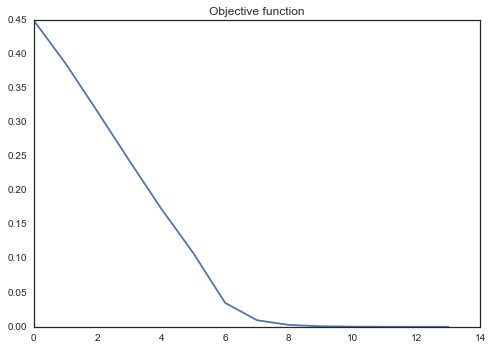

In [511]:
# we fiddled around with these parameters
itol = 50
otol = 0.00001

A_init = np.eye(3)

final_A, obj = em(X_prime, Y_prime, A_init, itol, otol)

In [512]:
final_A

array([[  9.22707343e-01,  -3.82285147e-01,   2.56034891e-17],
       [  3.82504715e-01,   9.22795268e-01,  -5.94730344e-18],
       [  5.50884557e-04,  -4.32661230e-05,   1.00000000e+00]])

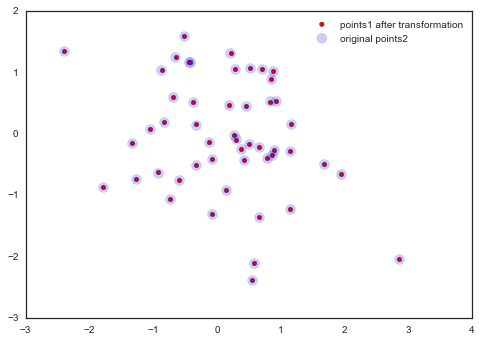

In [513]:
# calculate
LHS = np.dot(points1, final_A)
RHS = points2
plt.scatter(LHS[:,0], LHS[:,1], c='r', label='points1 after transformation')
plt.scatter(RHS[:,0], RHS[:,1], c='b', label='original points2', s=100, alpha=0.2)
plt.legend()
plt.show()

<div class="alert alert-info">
The points appear to overlap, which suggests we have inferred the requisite affine matrix. <br><br>

With regard to preference, EM provides no guarantee of convergence to a global optimum; in particular, we noticed that when we used a difference distance metric, EM would often converge to a local optimum which we knew was not the correct answer. Furthermore, according to Wikipedia, EM can perform particularly poorly in high dimensions. However, it appeared that when we started close to the global optimum, convergence was very quick. <br><br>

In contrast, it took SA a long time to find our optimal solution, and in fact, it was necessary to tune the parameters and repeat the search multiple times. That said, in theory SA will, give enough time, find the optimal solution, and even in a fixed period of time it is possible to find a decent approximation of the solution. <br><br>

For example, when we used the norm distance between XA and Y as the distance measure for both cases, SA often found a minimum that had a lower distance values than the minimum that EM would return. Moreover, in general, it would appear that EM could potentially be much more computationally intensive (e.g. in higher dimension cases), as well as being less robust. <br><br>

That said, it seemed EM could potentially be applied to problems involving complex likelihoods, perhaps where identifying a suitable objective function for SA may not be straightforward. Also, the EM solution appeared relatively easier to code.
</div>

# Problem 3 Time Series

Below you find 200 data points from a time series. Your task is to model this data using a simple autoregressive model:

$$
X_t=\alpha X_{t-1}+r_t
$$
where $r_t$ is normally distributed: $r_t \sim\mathcal{N}(0,\sigma^2)$

Here are your tasks:
* Implement a maximum likelihood estimation(MLE) method to estimate $\alpha$
* Use any MCMC algorithm of your choice to infere $\sigma^2$ and $\alpha$
* Forecast 3 time points ahead and provide posteriors for these three points

In [81]:
# Here is the data
y=np.array([0.00000000e+00,  -2.41884381e-01,  -2.19815584e-01, -5.92654275e-03,   3.89498469e-02,  -7.06374756e-01,
         6.09244734e-02,  -1.36663360e+00,  -1.63887006e+00, -1.31721354e+00,  -1.52424274e+00,  -1.23902096e+00,
        -6.63029664e-01,  -5.97693396e-01,   1.26359198e-01, 6.55116724e-01,   2.98253859e-01,   7.19461104e-03,
         4.04113046e-01,   7.29893878e-01,  -1.96731327e-03, 4.64230686e-01,  -6.79727540e-02,  -4.19137503e-01,
        -4.03256074e-01,  -8.70131096e-01,  -8.25921060e-01, 4.69417714e-01,  -1.00177377e-01,   6.34076840e-02,
        -1.05978178e-01,  -1.48916430e-01,  -5.43573786e-02, 4.61970441e-01,   8.18280558e-01,   2.87185308e-01,
         1.26715777e+00,   6.41828280e-01,   8.77364512e-01, 3.67214345e-01,   6.26413729e-01,   2.87102039e-02,
         4.28449069e-01,   7.31450267e-01,   6.19131504e-01, 6.33373751e-01,   3.17572088e-01,   3.51692600e-01,
        -2.48995087e-02,  -2.53030153e-01,  -2.15503832e-01,-6.20238803e-01,  -5.28176551e-01,  -5.99112522e-01,
         3.32834574e-01,   4.01426008e-01,  -6.37956657e-01,-4.52884655e-01,  -1.16203988e+00,  -8.82257305e-01,
        -6.19309194e-01,  -4.78009274e-01,  -2.32960888e-01, 3.80860392e-01,  -5.52337194e-01,   6.43589528e-01,
        -1.71939822e-01,  -2.22714248e-02,   1.69698173e-01, 2.26875861e-01,   6.27784254e-02,   9.59070565e-01,
        -2.00412521e-01,   1.62853318e-02,  -1.64492388e-02,-5.92514844e-01,  -1.43386816e-01,  -9.50829381e-01,
        -1.07109089e+00,  -5.47941202e-01,  -6.80501959e-01,-1.22073393e+00,  -5.09858830e-01,  -1.24176275e+00,
        -6.30383282e-01,  -8.67182207e-01,  -9.67761290e-01,-1.79674059e-01,   6.09919157e-01,   9.95635469e-02,
         2.28199545e-01,   4.21792446e-01,   1.69467875e-01,-2.59645693e-01,  -4.93207819e-01,  -5.01539736e-01,
        -6.05873935e-01,  -6.11037064e-01,   1.01647103e-01,-1.44991643e-01,  -4.33238432e-02,  -6.41062073e-02,
        -2.85514261e-01,  -3.95586179e-01,  -3.57194799e-01,-2.20170569e-01,  -3.39918202e-01,   1.70035788e-01,
         7.41558107e-01,   8.33120964e-01,   3.73995334e-01, 4.83141624e-01,  -1.28861162e-01,  -4.22192149e-01,
         5.78378631e-01,   1.43550174e-01,  -1.31226657e-01,-5.30885377e-01,  -8.76270272e-01,  -4.34154230e-01,
        -5.02379201e-01,  -5.14585915e-01,  -4.64397849e-01, 1.65475660e-01,   1.07774616e-01,  -9.65587168e-01,
        -8.60566293e-01,  -2.36405434e-01,  -4.12606502e-01,-5.58566210e-01,   1.20028400e+00,   9.96896069e-01,
         4.41653164e-01,   1.59249052e-01,  -1.74168536e-01, 5.63049814e-01,   7.39366310e-01,   6.05361272e-01,
         2.79509214e-01,  -6.26883609e-01,  -4.44982987e-01,-8.69359696e-01,  -9.27422224e-01,  -6.98179880e-01,
        -1.35445853e+00,  -1.12329955e+00,  -4.94572306e-01,-3.40507834e-01,  -8.37907253e-01,  -9.97003760e-01,
        -7.69088724e-01,  -4.77378429e-01,   4.52315984e-02, 8.76114754e-02,  -9.24336169e-02,   4.42178858e-01,
         6.32190755e-01,   8.18383124e-01,   2.95975304e-01,-2.38797237e-02,   1.16395924e-01,   5.62311884e-02,
        -3.15966789e-01,  -3.16808474e-01,  -1.16651970e+00,-1.01729199e+00,  -7.75285712e-01,  -4.17618624e-01,
        -7.65156825e-01,  -5.10469718e-01,  -3.25334859e-01, 1.06358791e-01,   4.03467712e-01,   5.62837155e-01,
         5.87793605e-01,   4.38191557e-01,  -4.17879322e-01,-3.19715350e-01,   3.41624528e-01,   4.93054502e-01,
         3.69746949e-01,   9.62398763e-02,  -2.81485049e-01,-3.37776564e-01,  -1.30858217e-03,   9.83538405e-01,
         6.94986165e-01,   2.41137851e-01,   2.79478944e-01, 5.13500357e-01,   4.17786188e-01,   7.46707509e-01,
         1.25038407e+00,   8.17699739e-01,   8.78811468e-02,-1.20413802e-01,  -1.83227208e-01,   8.06195706e-02,
         4.16043086e-01,   6.45585187e-02])


<div class="alert alert-info">
<h2>Answer</h2>
<br>References: http://www-stat.wharton.upenn.edu/~stine/stat910/lectures/12_est_arma.pdf, https://en.wikipedia.org/wiki/Normal_distribution
</div>

The likelihood function can be defined as:

$$
\begin{aligned}
L & = p(x_1) \, p(x_2|x_1) \, p(x_3|x_2) \dots p(x_N|x_{N-1})  \\
&\propto p(x_2|x_1) \, p(x_3|x_2) \dots p(x_N|x_{N-1}) \\
\end{aligned}
$$

Noting that $r_t$ is Normally distributed with mean $\alpha x_{t-1}$, then:

$$
\begin{aligned}
L & = \prod_2^T p(x_t|x_{t-1}) \\
&=  \prod_2^T C_1 exp[- C_2 (x_t - \alpha x_{t-1})^2]
\end{aligned}
$$

where $C_1$ and $C_2$ are constants not dependent on $\alpha$.  We now take the log, set the derivative of the log likelihood with respect to $\alpha$ to zero, and solve for $\alpha$:

$$
\begin{aligned}
\log L &= \sum_2^T \log C_1 - C_2 (x_t - \alpha x_{t-1})^2] \\
(\log L)^\prime &\propto \sum_2^T (x_t - \alpha x_{t-1}) x_{t-1} = 0
\end{aligned}
$$

dropping constants.  Solving for $\alpha$ we get:

$$
\begin{aligned}
&\sum_2^T x_t \, x_{t-1} - \alpha \sum_2^T x_{t-1} \, x_{t-1} = 0 \\
&- \alpha \sum_2^T x_{t-1} \, x_{t-1} = - \sum_2^T x_t \, x_{t-1} \\
&\alpha  = \frac{\sum_2^T x_t \, x_{t-1}}{\sum_2^T (x_{t-1})^2}
\end{aligned} 
$$

We can plot the time series and then code this.

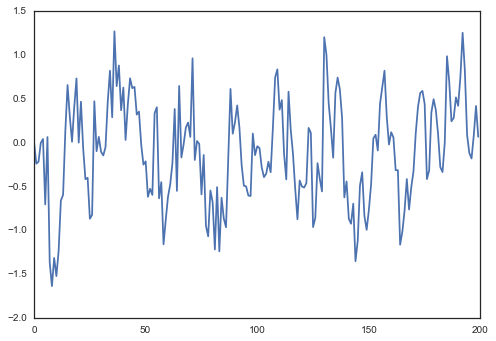

In [82]:
plt.plot(np.arange(len(y)), y);

In [94]:
def maximum_likelihood_estimate(series):
    n, d = 0, 0
    for i in xrange(len(series)):
        if i > 0:
            n += series[i] * series[i-1]
            d += series[i-1]**2
    
    return n * 1.0 / d

In [95]:
maximum_likelihood_estimate(y)

0.68164697755345038

<div class="alert alert-info">
Let's use PyMC.
</div>

In [97]:
# Jeffery's (scale-invariant) prior
@pm.stochastic(observed=False)
def sigma(value=1):
    return 1  # constant for Gaussian

@pm.stochastic(observed=False)
def alpha(value=1):
    return 1  # constant for Gaussian

@pm.observed
def likelihood(value=y, sigma=sigma, alpha=alpha):
    temp = 0
    for i in xrange(len(value)):
        if i > 0:
            temp += pm.normal_like(value[i], mu = alpha * value[i-1], tau = 1/sigma**2)
    return temp

In [103]:
model = pm.Model([likelihood, sigma, alpha])
mcmc = pm.MCMC(model)
mcmc.sample(iter=105000, burn=5000, thin=2)

 [-----------------100%-----------------] 105000 of 105000 complete in 155.2 sec

Plotting alpha


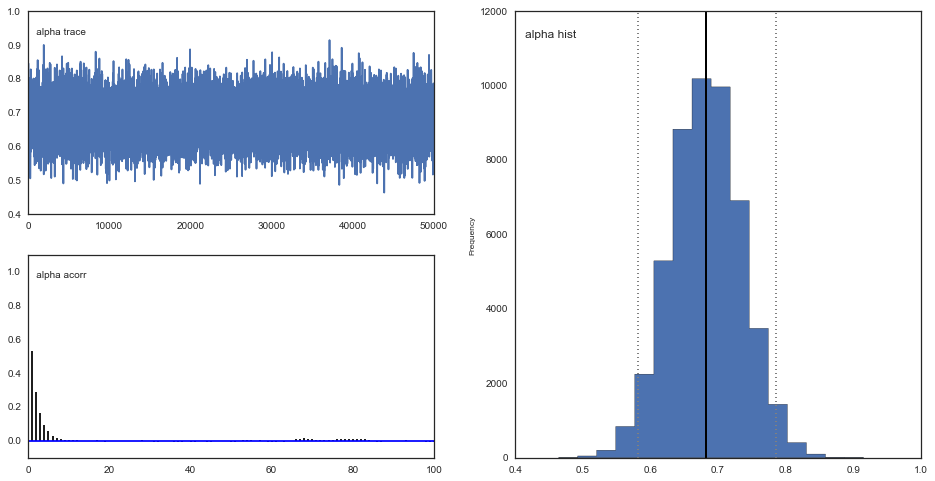

In [104]:
fig = plt.figure(figsize=(16,8))
pm.Matplot.plot(alpha, new=False)

Plotting sigma


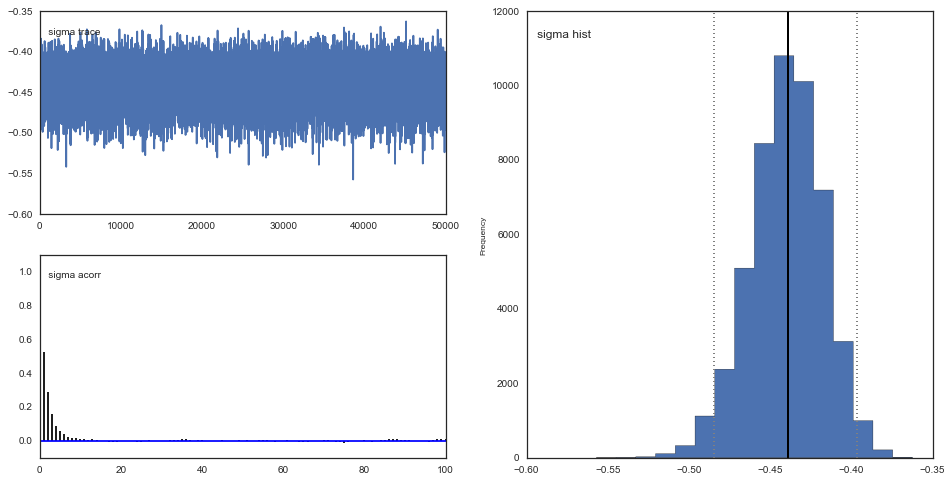

In [105]:
# Note this is sigma while the question asks for the variance 
fig = plt.figure(figsize=(16,8))
pm.Matplot.plot(sigma, new=False)

<div class="alert alert-info">
Check for convergence.
</div>

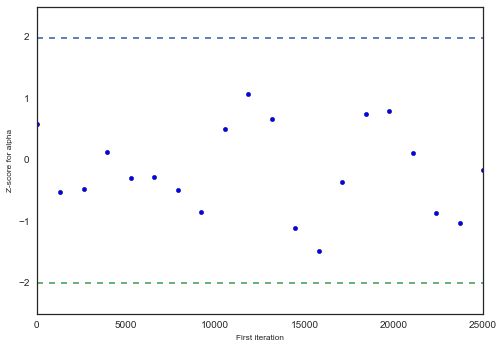

In [106]:
gs1 = pm.geweke(alpha.trace(), first=0.1, last=0.5, intervals=20)
pm.Matplot.geweke_plot(gs1, "alpha")

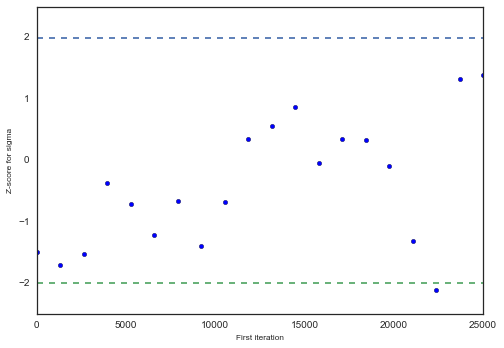

In [107]:
gs2 = pm.geweke(sigma.trace(), first=0.1, last=0.5, intervals=20)
pm.Matplot.geweke_plot(gs2, "sigma")

In [108]:
mcmc.summary()


sigma:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-0.44            0.022            0.0              [-0.484 -0.397]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-0.487           -0.454          -0.439         -0.424        -0.399
	

alpha:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.682            0.052            0.0              [ 0.581  0.786]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.58             0.647           0.683          0.717         0.785
	


In [110]:
sigmasq = (-0.44)**2
sigmasq

0.1936

<div class="alert alert-info">
We infer $\alpha$ to be 0.682 and $\sigma^2$ to be 0.1936. We can now consider these parameters as fixed. We use the formula and calculate a distribution for the next three points, taking the mean prediction from one new point to predict the subsequent new point.
</div>

In [122]:
N_samples = 1000
N_predicted_points = 3
sigma = 0.44
alpha = 0.682

t_plus = np.zeros((N_predicted_points, N_samples))  # store all our samples
last_x = y[-1]  # start with last data from the data set

for i in xrange(N_predicted_points):
    for j in xrange(N_samples):
        r_t = np.random.normal(0, sigma)  # draw from normal with inferred sigma
        t_plus[i, j] = last_x * alpha + r_t
    last_x = np.mean(t_plus[i,])  # use mean as springboard for next point


 info for new projected point  1
point estimate: 0.0535748730854
error estimate (1 s.d.): 0.43344281508

 info for new projected point  2
point estimate: 0.0255843359314
error estimate (1 s.d.): 0.442096092264

 info for new projected point  3
point estimate: 0.0159228068826
error estimate (1 s.d.): 0.432953406366


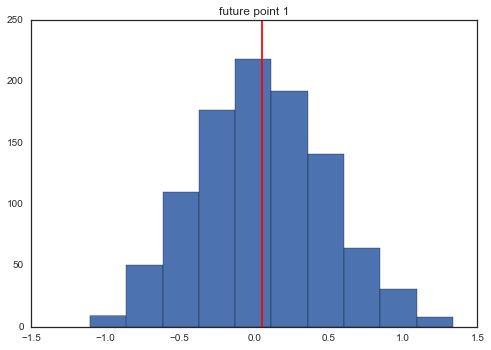

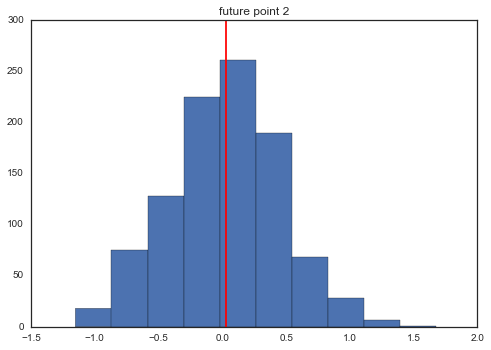

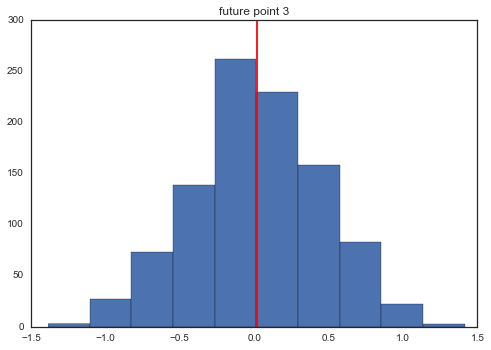

In [123]:
# plot posterior predictives

for i in xrange(N_predicted_points):
    print "\n info for new projected point ", i + 1
    print "point estimate:", np.mean(t_plus[i,])
    print "error estimate (1 s.d.):", np.std(t_plus[i,])
    plt.figure()
    plt.title("future point " + str(i+1))
    plt.axvline(np.mean(t_plus[i,]), color="r")
    plt.hist(t_plus[i,]);


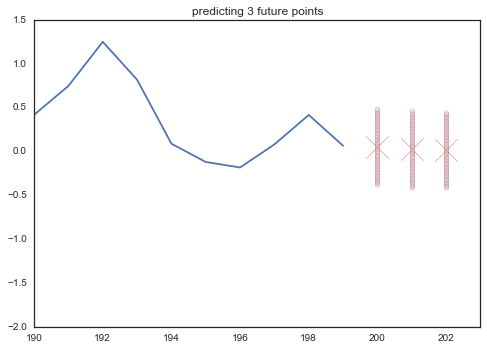

In [147]:
plt.plot(np.arange(len(y)), y)
plt.xlim(len(y)-10, len(y) + N_predicted_points)

for i in xrange(N_predicted_points):
    plt.scatter(len(y)+i, np.mean(t_plus[i,]), marker="x", s=500, c="r")
    plt.scatter([len(y)+i] * 100, np.linspace((np.mean(t_plus[i,]) - np.std(t_plus[i,])), 
                (np.mean(t_plus[i,]) + np.std(t_plus[i,])), 100), alpha=0.2, c="pink")

plt.title("predicting 3 future points");

<div class="alert alert-info">
The above plot shows the end of the time series as given; the red bars represent 1 standard deviation from the predicted value. <br><br>

We noted that the predictions are somewhat unrealistic when using this method, since the noise will not likely move the mean of each point significantly from the last. Therefore, alternatively, rather than using the mean value from the previous point, we can draw from the entire distribution of the previous point to determine the mean of the successive point. This may or may not be a more realistic model.
</div>


 info for new projected point  1
point estimate: 0.0731023921693
error estimate (1 s.d.): 0.440831286573

 info for new projected point  2
point estimate: -0.103400853302
error estimate (1 s.d.): 0.449718072225

 info for new projected point  3
point estimate: -0.499374719828
error estimate (1 s.d.): 0.438703598675


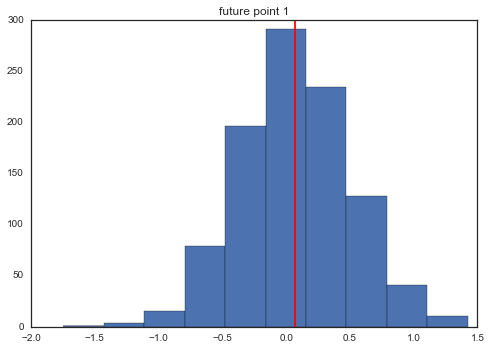

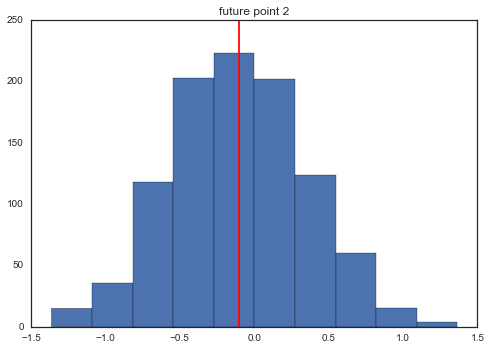

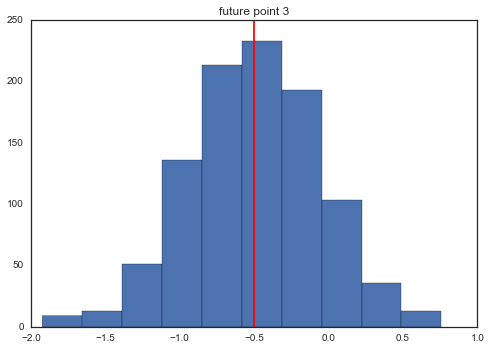

In [514]:
N_samples = 1000
N_predicted_points = 3
sigma = 0.44
alpha = 0.682

t_plus = np.zeros((N_predicted_points, N_samples))  # store all our samples
last_x = y[-1]  # start with last data from the data set

for i in xrange(N_predicted_points):
    for j in xrange(N_samples):
        r_t = np.random.normal(0, sigma)  # draw from normal with inferred sigma
        t_plus[i, j] = last_x * alpha + r_t
    last_x = np.random.choice(t_plus[i,])  # draw from values to get new mean
    
# plot posterior predictives

for i in xrange(N_predicted_points):
    print "\n info for new projected point ", i + 1
    print "point estimate:", np.mean(t_plus[i,])
    print "error estimate (1 s.d.):", np.std(t_plus[i,])
    plt.figure()
    plt.title("future point " + str(i+1))
    plt.axvline(np.mean(t_plus[i,]), color="r")
    plt.hist(t_plus[i,]);

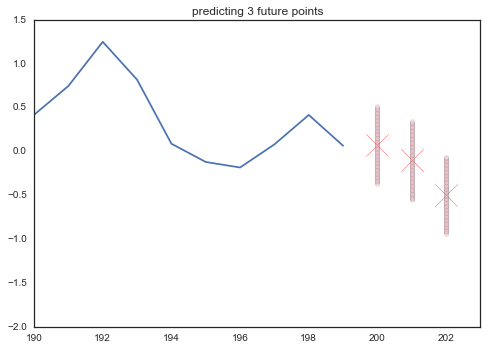

In [515]:
plt.plot(np.arange(len(y)), y)
plt.xlim(len(y)-10, len(y) + N_predicted_points)

for i in xrange(N_predicted_points):
    plt.scatter(len(y)+i, np.mean(t_plus[i,]), marker="x", s=500, c="r")
    plt.scatter([len(y)+i] * 100, np.linspace((np.mean(t_plus[i,]) - np.std(t_plus[i,])), 
                (np.mean(t_plus[i,]) + np.std(t_plus[i,])), 100), alpha=0.2, c="pink")

plt.title("predicting 3 future points");

# Extra Problem 4: Final Project Proposal 

Think about your final project proposal. Your final project is your chance to show off what you learned in AM207! You have seen a lot of different models and examples in lecture and in the homework assignments. In your final project you are free to apply all the techniques you learned to an area of your choice. Be careful not to choose data that you still need to label yourself or that will take you ages to clean. The main focus should be on finding a good model and comparing different techniques for sampling, optimization, etc. 

Please note that there will be a google spreadsheet where you can submit your final project proposal abstract. No need to write it into this notebook. 

The abstract should be short, but contain a short description of your final project idea, which methods you are planning on using, and where your data will come from. 

<div class="alert alert-info">
Submitted.
</div>